# King County Housing Characteristics

<img src="Images/KC_zips3.png">

Using multiple linear regression analysis models to infer the price of homes based on their existing characteristics.

**Business problem:**

King County home sales have been increasing as Seattle continues to grow. Top notch labor and a favorable climate make King County a desirable place to live and work. Our real estate team has been tasked with advising clients on the fair value of their home. When our team lists our client's homes, we want to ensure the price is accurate compared to the market.

The model also guides clients on which features to prioritize for increasing home value. This can include renovation, expanding square footage, or other suggestions within the owners control.

## Data

- 21,597 rows by 21 columns
- CSV Formatted

## Roadmap

- Scrub data to handle null values and duplicates
- Add additional features to better infer the price of home based on existing characteristics
- Check for linearity and multicollinearity to make sure that model meets relevant assumptions
- Perform outlier removal methods to better meet the assumptions of the linear regression model
- Use One Hot Encoding to handle categorical variables
- Provide accompanying visualizations to support and interpret the findings of the model
- Circle back to how the multiple linear regression model supports the recommendations for how prices can be predicted based on existing characteristics

# Scrub Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Descriptions of columns

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Quality of view
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
# Evaluating if type matches column description

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Date should be a datetime object
- Sqft basement should be an integer, not object

In [3]:
# Make date into datetime object

df['date'] = pd.to_datetime(df['date'])

In [4]:
# Observe summary statistics

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


- ID is a random value so should not be evaluated as a continuous variable
- Price has a large standard deviation and most likely contains outlier values
- Waterfront is a binary variable
- Floors, view, condition, and grade are discrete variables
- Zipcode, latitude, and longitude are not continuous variables


## Handling Null Values

<AxesSubplot:>

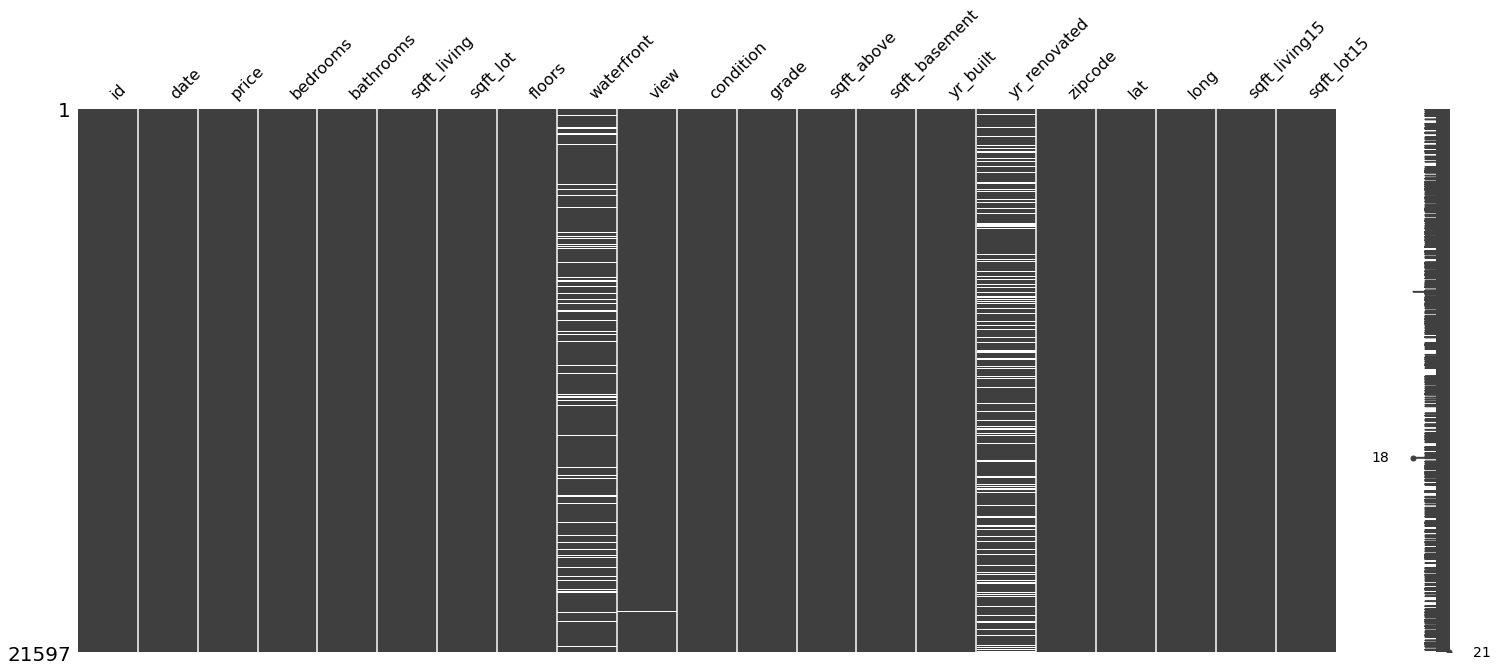

In [5]:
# Visualize which columns contain null values

import missingno
missingno.matrix(df)

Waterfront, view, and yr_renovated contain null values

In [6]:
# Check how many null values are in each column

null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [7]:
# Create formulat to impute null values with probability that they appear in the distribution

def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

### Fill in missing Values for 'view' column
Interpreting 'view' as quality of the view from the home. For example, a 4 would be a stunning view, maybe of the mountains or a lake. Can be a beautiful view of nature or the urban environmnt. A view of 0 would be described as highly undesirable, like looking directly into a neighbor's property, or an unappealing natural characteristic. 

In [8]:
print('Value Counts Normalized')
print(df['view'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['view'].value_counts(dropna=False))

Value Counts Normalized
0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
nan    0.00
Name: view, dtype: float64
------------------------
Value Counts Absolute
0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
nan        63
Name: view, dtype: int64


I have gone ahead and made the assumption that a **nan** represents a value that is missing completely at random. I will use impute_cat to insert a value between 0-4 based on the probability of the original variables distribution
- 90% chance of imputing a 0
- 2% chance of imputing a 1
- 4% of imputing a 2
- 2% of imputing a 3
- 1% of imputing a 4

In [9]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0.00,0.00,3,8,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0.00,0.00,3,8,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0.00,0.00,3,7,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,nan,0.00,3,8,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [10]:
# Confirm that there are no more null values in the view column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'yr_renovated' column
Describes when the home was most recently renovated

In [11]:
print('Value Counts Normalized')
print(df['yr_renovated'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['yr_renovated'].value_counts(dropna=False))

Value Counts Normalized
0.00      0.79
nan       0.18
2014.00   0.00
2003.00   0.00
2013.00   0.00
          ... 
1944.00   0.00
1948.00   0.00
1976.00   0.00
1934.00   0.00
1953.00   0.00
Name: yr_renovated, Length: 71, dtype: float64
------------------------
Value Counts Absolute
0.00       17011
nan         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1944.00        1
1948.00        1
1976.00        1
1934.00        1
1953.00        1
Name: yr_renovated, Length: 71, dtype: int64


Most of the values in yr_renovated are either 0 or nan. When performing imputation going to simply fill in a 0 for missing value as opposed to imputing the year based on probability.

Since this value has ~79% 0 values, I will most likely feature engineer it to be a binary variable. Either the home has been renovated or it has not

In [12]:
df[df['yr_renovated']>0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,744.00,744.00,744.00,744.00,744.00,744.00,744.00,652.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00
mean,4418716401.67,768901.89,3.46,2.31,2327.38,16215.53,1.50,0.04,0.60,3.22,7.75,1878.72,1939.46,1995.93,98095.62,47.58,-122.26,1988.88,13390.77
std,2908265353.00,627125.79,1.07,0.90,1089.00,38235.31,0.49,0.21,1.21,0.52,1.20,849.44,22.09,15.60,54.86,0.12,0.13,715.44,26213.65
min,3600057.00,110000.00,1.00,0.75,520.00,1024.00,1.00,0.00,0.00,1.00,4.00,520.00,1900.00,1934.00,98001.00,47.20,-122.50,828.00,1281.00
25%,1922984893.00,412250.00,3.00,1.75,1560.00,5000.00,1.00,0.00,0.00,3.00,7.00,1267.50,1921.00,1987.00,98040.00,47.52,-122.36,1460.00,5000.00
50%,3899100167.50,607502.00,3.00,2.25,2200.00,7375.00,1.50,0.00,0.00,3.00,8.00,1730.00,1941.50,2000.00,98112.00,47.60,-122.29,1850.00,7455.00
75%,7014200237.50,900000.00,4.00,2.75,2872.50,12670.75,2.00,0.00,0.00,3.00,8.00,2300.00,1955.00,2007.25,98126.00,47.67,-122.21,2380.00,10925.75
max,9829200250.00,7700000.00,11.00,8.00,12050.00,478288.00,3.00,1.00,4.00,5.00,13.00,8570.00,2003.00,2015.00,98199.00,47.78,-121.36,5500.00,310582.00


The most recent renovation took place in 2015. The oldest recorded renovation was in 1934

In [13]:
# Going to assume that a null value means that the home has never been renovated
# This is equivalent to a 0 which is why I am filling null values with 0

df['yr_renovated'].fillna(0, inplace=True)

In [14]:
# Confirm that there are no more null values in the yr_renovated column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'waterfront' column
Waterfront is a binary variable. 1 means the home has a view of the water. 0 means the home does not have a view of the water
- Based on national home prices, waterfront properties tend to be more expensive than non-waterfront homes. People appreciate the view of the ocean, or a lake, and enjoy easy access to bodies of water especially during the summer
- I'd like to explore if homes prices at greater than $1,000,000 are more likely to have a waterfront view
- I can then use this finding to subset the data based on a home prices threshold and impute the missing waterfront variables with more accuracy

In [15]:
# Check if mean of price is greater for homes with waterfront views

df.groupby('waterfront')[['price', 'view']].mean()

,price,view
waterfront,,
0.00,532641.99,0.20
1.00,1717214.73,3.76


As expected, waterfront homes have a greater mean price than non-waterfront homes. Their view score is also much higher because the proximity to water. It is easier to see the ocean, lake, or river which enhances the view score as it is a desirable natural feature

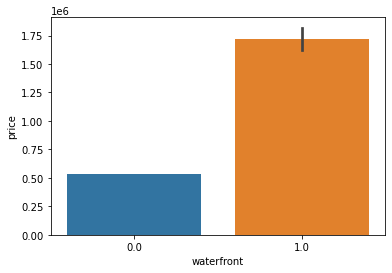

In [16]:
import seaborn as sns

sns.barplot(data=df, x='waterfront', y='price', ci=68);

Clearly, waterfront homes are more expensive than non-waterfront homes

In [17]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [18]:
# Observe ratio of waterfront homes for homes over $1,000,000 and those below

pd.set_option('display.float_format', lambda x: '%.5f' % x)

print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


- 7.3% of homes priced over \$1 million have waterfront views
- 0.02% of homes priced under \$1 million have waterfront views
- As a result, I am going to subset the data by a \$1 million threshold limit and then impute the missing waterfront value. The reason I am doing this is because the more expensive homes are far more likely to have waterfront views and I don't want them to have the same probability of being assigned a waterfront view. 

In [19]:
# Subset the data into two slices based on $1 million threshold

df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [20]:
# Use impute_cat on homes over $1,000,000

df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
# Simply fill the missing waterfront values with 0 for homes under $1,000,000 because the
# probability of them having a waterfront view is far lower

df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-21-3a74373b56b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [22]:
# Join the data back together

df=pd.concat([df_1mminus, df_1mplus])

In [23]:
# Confirm there are no more missing values

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Missing values are handled, next step is to address duplicate values

## Handling Duplicates

In [24]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Initially, it appears that we don't have any duplicates in the dataset. However, df.duplicated() only returns duplicate values if **all** columns in the row are matching. It may be produnt to check if there are any duplicates that appear in the 'id' column

In [25]:
# Check duplicats by 'id'
display(len(df))
df[df.duplicated(subset=['id'],keep=False)]


21565

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.00000,3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,2014-12-23,700000.00000,3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
324,7520000520,2014-09-05,232000.00000,2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,1984.00000,98146,47.49570,-122.35200,1820,7460
325,7520000520,2015-03-11,240500.00000,2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,1984.00000,98146,47.49570,-122.35200,1820,7460
345,3969300030,2014-07-23,165000.00000,4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14294,3528000040,2014-10-01,1690000.00000,3,3.25000,5290,224442,2.00000,0.00000,0.00000,4,11,4540,750.0,1988,0.00000,98053,47.66710,-122.05100,3750,84936
14295,3528000040,2015-03-26,1800000.00000,3,3.25000,5290,224442,2.00000,0.00000,0.00000,4,11,4540,750.0,1988,0.00000,98053,47.66710,-122.05100,3750,84936
15999,5536100020,2015-05-12,1190000.00000,3,2.00000,2160,15788,1.00000,0.00000,0.00000,3,8,2160,0.0,1951,0.00000,98004,47.62270,-122.20700,2260,9787
18976,7856400300,2014-07-02,1410000.00000,2,2.50000,3180,9400,2.00000,0.00000,4.00000,5,10,2610,570.0,1985,0.00000,98006,47.56170,-122.15800,3760,9450


Here, we see that when we check for duplicates by 'id' we do have duplicate rows. The only difference between the first and last duplicate row is date and price. This leads me to believe that the duplicate is shown because there was a sale. As a result, I am only going to keep the 'last' value because I want to reflect the most recent change of value and accurate price.

In [26]:
df=df.drop_duplicates(subset=['id'], keep='last')
print(len(df))

21388


Our dataset went from 21,565 observations to 21,388. We removed 177 duplicate  values. 

In [27]:
# Confirm that there are no more duplicate observations in the dataset

df.duplicated(subset=['id'],keep=False).sum()

0

# Exploratory Data Analysis

- Explore the distribution of each variable and their relationship with price
- Determine if variables are discrete or continuious
- Determine if variables are categoric or numeric
- Check if their skew in the distribution or normal
- Check if their are outlier values and if they appear above the median or below the median

In [28]:
def distr_(df, col):
    """
    Produces a boxplot, scatterplot, and histogram/kde
    Produces summary statistics
    """
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col.capitalize()} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    plt.show()

## Handling Error in Basement encoding

When initially running the EDA check, sqft_basement throws an eror so going to further inspect what is causing the error

In [29]:
# Check values

df['sqft_basement'].value_counts(0)

0.0       12701
?           452
600.0       215
700.0       205
500.0       205
          ...  
475.0         1
1245.0        1
4130.0        1
3480.0        1
2350.0        1
Name: sqft_basement, Length: 304, dtype: int64

452 values have a question mark. I am going to assume that a question mark means the data is missing. Since the question mark only represents ~2% of the data, changing it to 0 will not alter the original distribution of the data. Additionally, since there are a high number of 0 values ~59% of the data, I am going to turn sqft_basement into a binary variable. 0 for no basement, 1 for basement is present. Otherwise, the standard deviation will be very large and it will be difficult to interpret

In [30]:
# Replace the question mark with a zero

df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)

In [31]:
df['sqft_basement'].value_counts(1)

0.0      0.61497
600.0    0.01005
700.0    0.00958
500.0    0.00958
800.0    0.00940
           ...  
276.0    0.00005
862.0    0.00005
417.0    0.00005
2850.0   0.00005
1135.0   0.00005
Name: sqft_basement, Length: 303, dtype: float64

Question mark is gone. 61% of homes do not have a basement

In [32]:
# Use .map to make sqft_basement into a binary variable

df['basementyes'] = (df['sqft_basement']>'0.0').map({True:1,
                                                      False: 0})

In [33]:
# Confirm that original sqft_basement and new column have equal distribution of 0 and 1 variables

df['basementyes'].value_counts(1)

0   0.61497
1   0.38503
Name: basementyes, dtype: float64

In [34]:
# Drop sqft_basement because we are replacing it with a binary reprsentation (either a home has a basement
# or it does not)

df=df.drop('sqft_basement', axis=1)

## Return to checking distributions, outliers, and relationship with price

Price Summary
Median: 450000.0
Mean: 5.412e+05
Max: 7700000.0
Min: 78000.0
Std: 3.674e+05


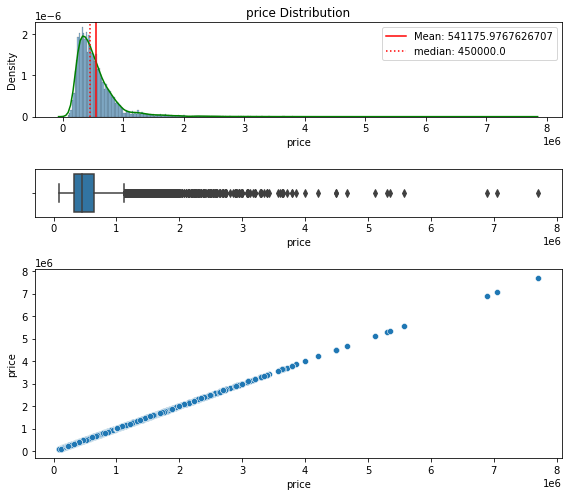

None
---------------------------------------------------------------------------------------
Bedrooms Summary
Median: 3.0
Mean: 3.373
Max: 33
Min: 1
Std: 0.9252


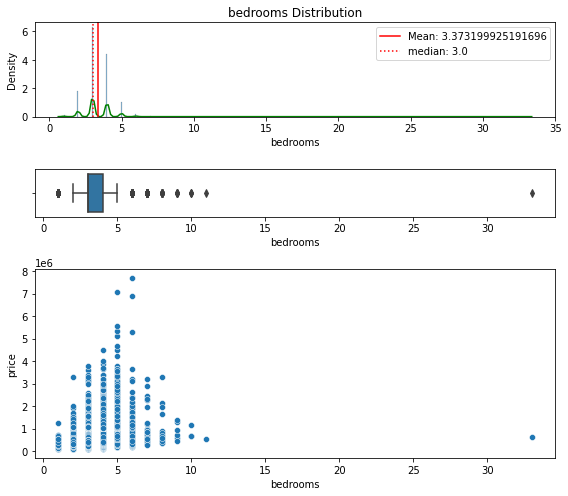

None
---------------------------------------------------------------------------------------
Bathrooms Summary
Median: 2.25
Mean: 2.118
Max: 8.0
Min: 0.5
Std: 0.7685


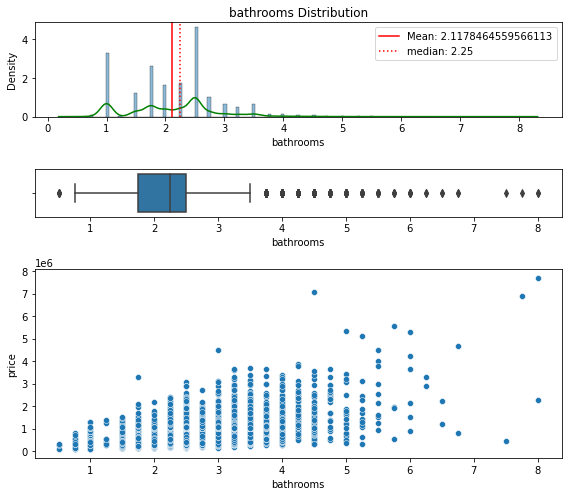

None
---------------------------------------------------------------------------------------
Sqft_living Summary
Median: 1920.0
Mean: 2.082e+03
Max: 13540
Min: 370
Std: 918.7


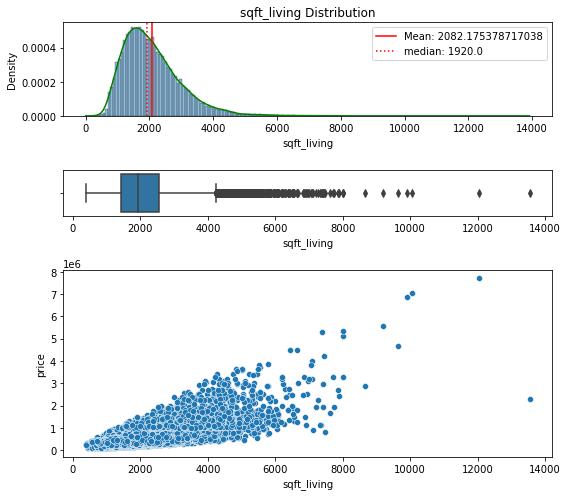

None
---------------------------------------------------------------------------------------
Sqft_lot Summary
Median: 7610.0
Mean: 1.513e+04
Max: 1651359
Min: 520
Std: 4.156e+04


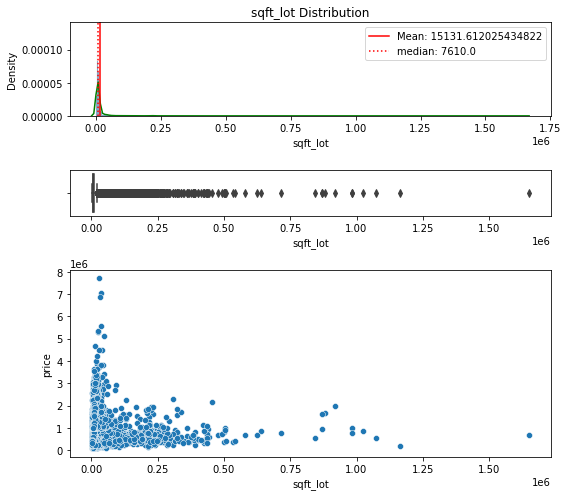

None
---------------------------------------------------------------------------------------
Floors Summary
Median: 1.5
Mean: 1.496
Max: 3.5
Min: 1.0
Std: 0.54


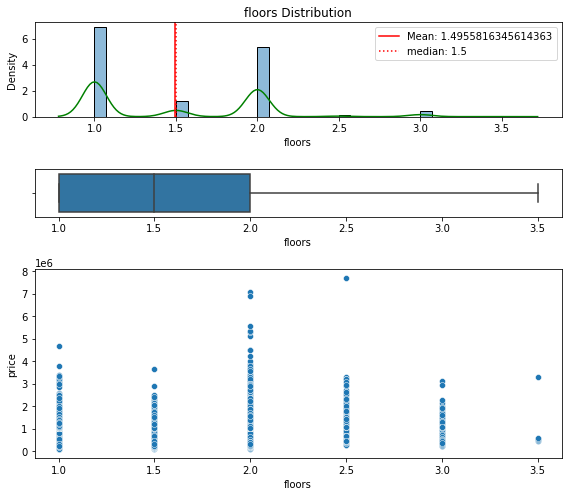

None
---------------------------------------------------------------------------------------
Waterfront Summary
Median: 0.0
Mean: 0.00678
Max: 1.0
Min: 0.0
Std: 0.08206


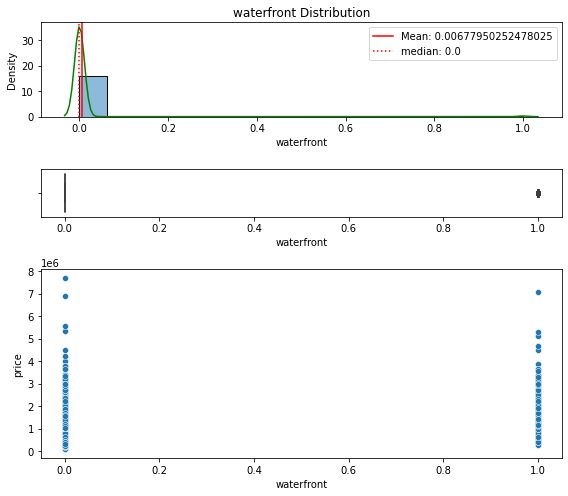

None
---------------------------------------------------------------------------------------
View Summary
Median: 0.0
Mean: 0.2332
Max: 4.0
Min: 0.0
Std: 0.7639


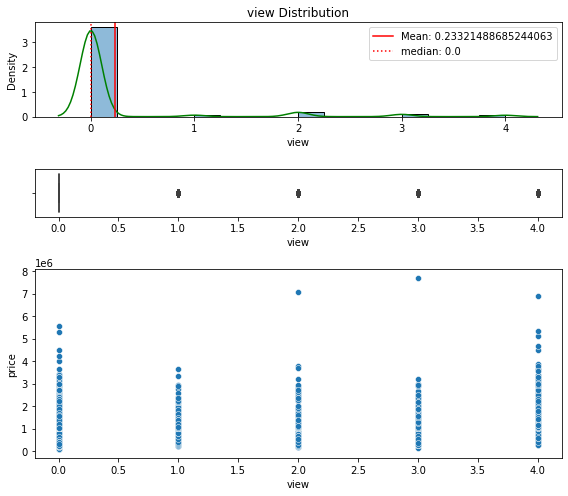

None
---------------------------------------------------------------------------------------
Condition Summary
Median: 3.0
Mean: 3.41
Max: 5
Min: 1
Std: 0.6496


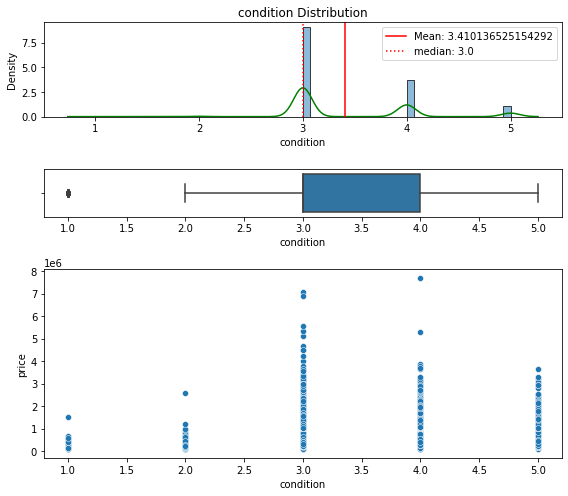

None
---------------------------------------------------------------------------------------
Grade Summary
Median: 7.0
Mean: 7.661
Max: 13
Min: 3
Std: 1.171


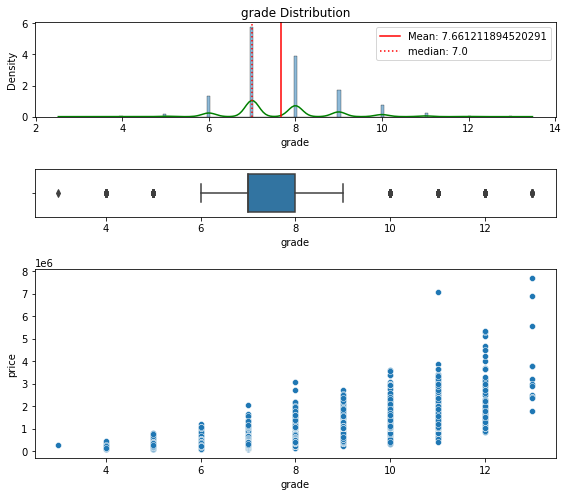

None
---------------------------------------------------------------------------------------
Sqft_above Summary
Median: 1560.0
Mean: 1.79e+03
Max: 9410
Min: 370
Std: 828.6


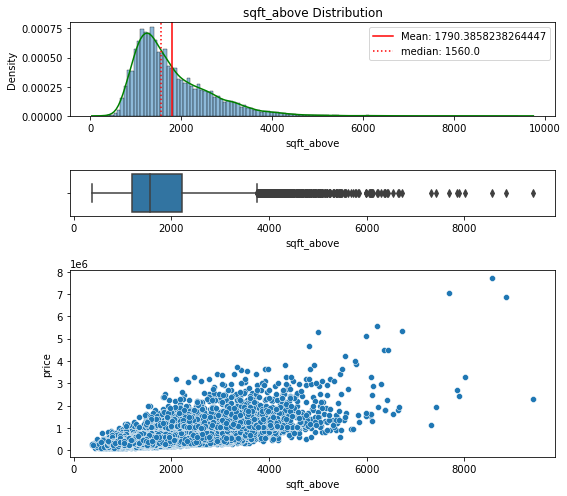

None
---------------------------------------------------------------------------------------
Yr_built Summary
Median: 1975.0
Mean: 1.971e+03
Max: 2015
Min: 1900
Std: 29.37


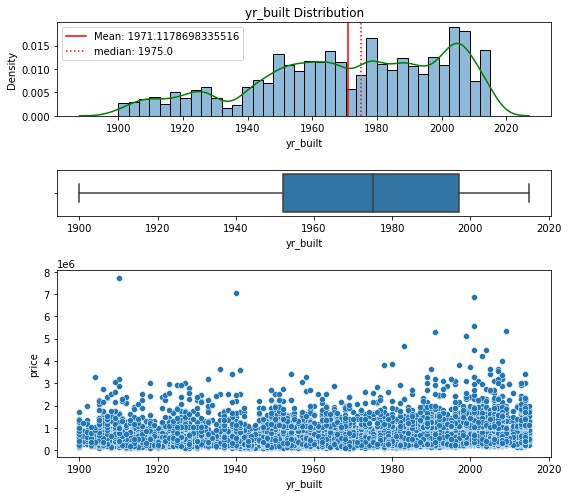

None
---------------------------------------------------------------------------------------
Yr_renovated Summary
Median: 0.0
Mean: 68.88
Max: 2015.0
Min: 0.0
Std: 364.3


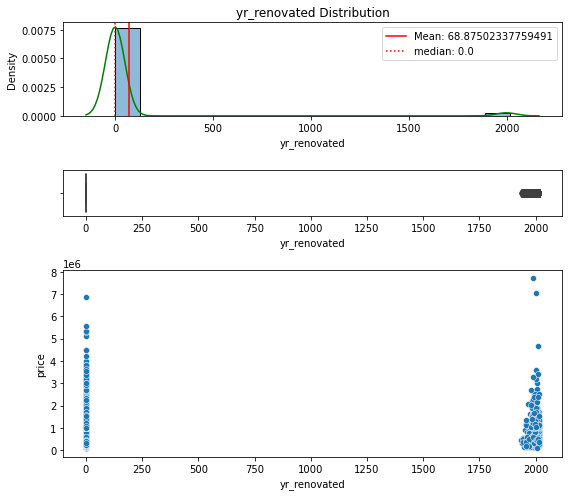

None
---------------------------------------------------------------------------------------
Zipcode Summary
Median: 98065.0
Mean: 9.808e+04
Max: 98199
Min: 98001
Std: 53.48


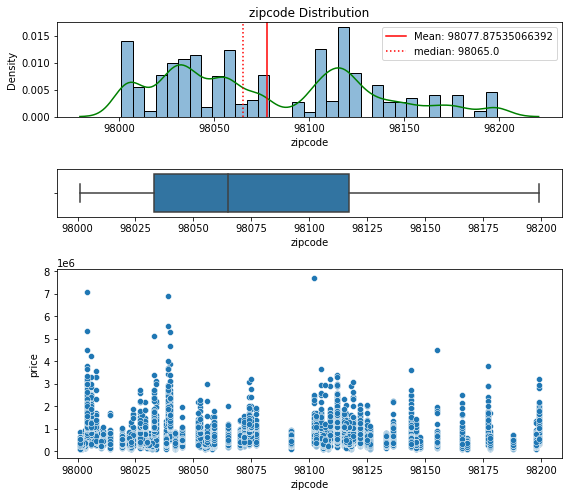

None
---------------------------------------------------------------------------------------
Lat Summary
Median: 47.5719
Mean: 47.56
Max: 47.7776
Min: 47.1559
Std: 0.1386


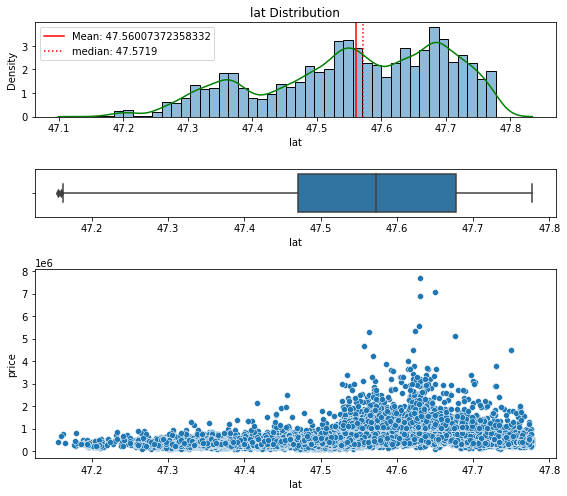

None
---------------------------------------------------------------------------------------
Long Summary
Median: -122.23
Mean: -122.2
Max: -121.315
Min: -122.51899999999999
Std: 0.1408


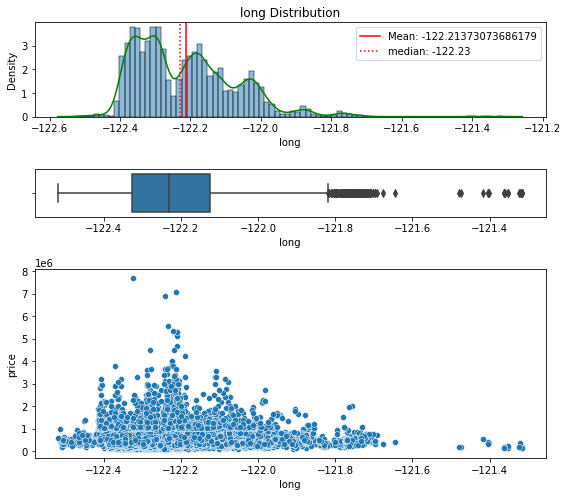

None
---------------------------------------------------------------------------------------
Sqft_living15 Summary
Median: 1840.0
Mean: 1.988e+03
Max: 6210
Min: 399
Std: 685.4


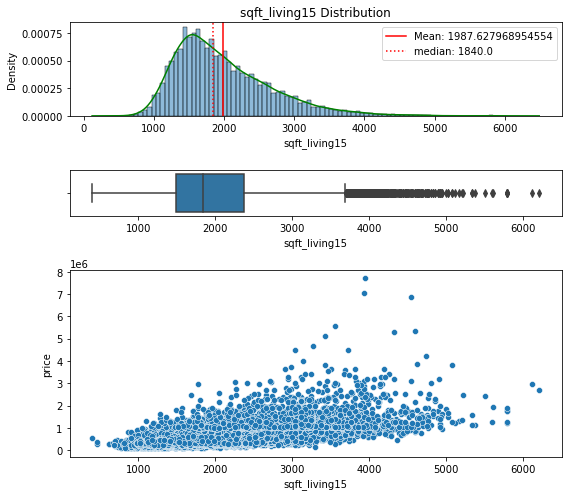

None
---------------------------------------------------------------------------------------
Sqft_lot15 Summary
Median: 7620.0
Mean: 1.278e+04
Max: 871200
Min: 651
Std: 2.736e+04


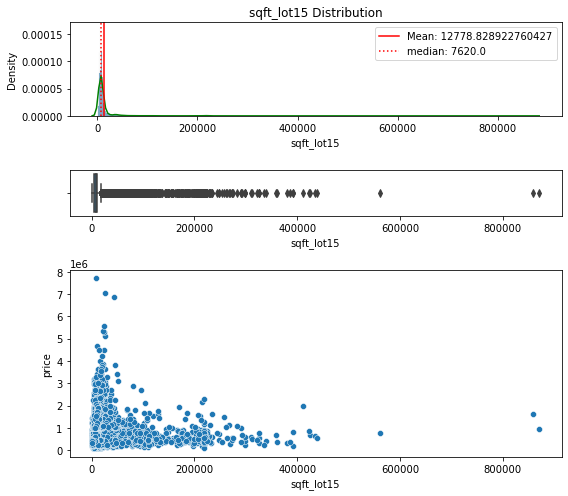

None
---------------------------------------------------------------------------------------
Basementyes Summary
Median: 0.0
Mean: 0.385
Max: 1
Min: 0
Std: 0.4866


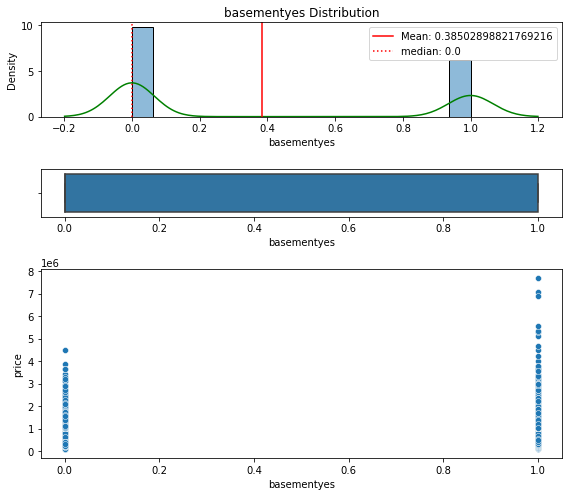

None
---------------------------------------------------------------------------------------


In [35]:
# Checking all variables except for id, zipcode, latitude, and longitude

eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))
    print('---------------------------------------------------------------------------------------')

### Individual EDA Analysis

1. Price
    1. **Distribution**: Binomial, Right skewed
    2. **Outliers**: Outliers upper IQR threshold
    3. **Relationship with price**: NA
    
2. Bedrooms
    1. **Distribution**: Bimodal
    2. **Outliers**: Outliers upper IQR threshold. Extreme outlier at 33 that should most likely be removed
    3. **Relationship with price**: Linear until 5/6 bedrooms
    4. **Discrete or Continuous**: Discrete-Possibly ordinal
    
3. Bathrooms
    1. **Distribution**: Bimodal
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Discrete-Ordinal

4. Sqft_living
    1. **Distribution**: Bimodal, skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous

5. Sqft_lot
    1. **Distribution**: Binomial, Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Non-Linear
    4. **Discrete or Continuous**: Continuous

6. Floors
    1. **Distribution**: Bimodal, Right skewed
    2. **Outliers**: None
    3. **Relationship with price**: Non-Linear-Non Ordinal
    4. **Discrete or Continuous**: Discrete

7. Waterfront
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete - Binary

8. View
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete

9. Condition
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Unclear. Seems to increase until 3 and then move down
    4. **Discrete or Continuous**: Discrete

10. Grade
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Discrete

11. Sqft_above
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous
 
12. Yr_Built
    1. **Distribution**: Left skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: None
    4. **Discrete or Continuous**: Continuous
    
13. Yr_Renovated
    1. **Distribution**: Bernoulli
    2. **Outliers**: None
    3. **Relationship with price**: None
    4. **Discrete or Continuous**: Continuous
    
14. Sqft_living15
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous
    
15. Sqft_lot15
    1. **Distribution**: Right skewed
    2. **Outliers**: Outliers upper IQR threshold.
    3. **Relationship with price**: Linear
    4. **Discrete or Continuous**: Continuous

15. Basementyes
    1. **Distribution**: Binary
    2. **Outliers**: None
    3. **Relationship with price**: Unclear
    4. **Discrete or Continuous**: Discrete-Binary

### Overall EDA Analysis

- Most of the continuous variables are right skeweed
- Supported by the distribution and mean being greater than the median
- High outlier values on the upper IQR threshold
- Yr_renovated has a lot of 0 values so may be improved by turning into a binary variable
- Bedrooms has a mistaken entry (33 bedrooms)

#### Handle Bedroom error

In [36]:
# Find the observation where bedroom is 33

df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes
15856,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0.00000,0.00000,5,7,1040,1947,0.00000,98103,47.68780,-122.33100,1330,4700,1


Appears to be a mistake because there is only 1.75 bathrooms and sqft living is only 1620. Going to drop column

In [37]:
df.drop(index=15856, inplace=True)

In [38]:
# Confirm it has been removed

df[df['bedrooms']>20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes


### Turn yr_renovated into binary values
- High amount of zero values, binary encoding will be a better indicator of relationship with price
- Otherwise, the standard deviation will be very high and it will be difficult to effectively interpret

In [39]:
df['yr_renovated'].value_counts(1)

0.00000      0.96549
2014.00000   0.00341
2003.00000   0.00145
2013.00000   0.00145
2007.00000   0.00140
               ...  
1934.00000   0.00005
1971.00000   0.00005
1954.00000   0.00005
1950.00000   0.00005
1944.00000   0.00005
Name: yr_renovated, Length: 70, dtype: float64

Aprox. 97% of values suggest the home has not been renovated. Safe to encode as has been renovated or has not been renovated

In [40]:
df['renovated_yes'] = (df['yr_renovated']>0).map({True:1,
                                                   False: 0})


In [41]:
# Confirm distribution has not changed

df['renovated_yes'].value_counts(1)

0   0.96549
1   0.03451
Name: renovated_yes, dtype: float64

In [42]:
# Dropping yr_renovated because we are replacing it with a binary variable

df.drop('yr_renovated', axis=1, inplace=True)

# Feature Engineering

- Explore adding additional predictor values to the model so that it can more accurately predict price
- Feature engineering allows for us to broaden our predictor values then what we are limited to with the original dataset
- Be cautious of multicollinearity because features will be engineering by transforming existing columns

## Total Rooms
- Add bedrooms and bathrooms to create new column called total_rooms
- This will provide us a summary of the number of rooms in the home

In [43]:
# Combine bedrooms and bathrooms

df['total_rooms'] = df['bedrooms']+df['bathrooms']

Total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


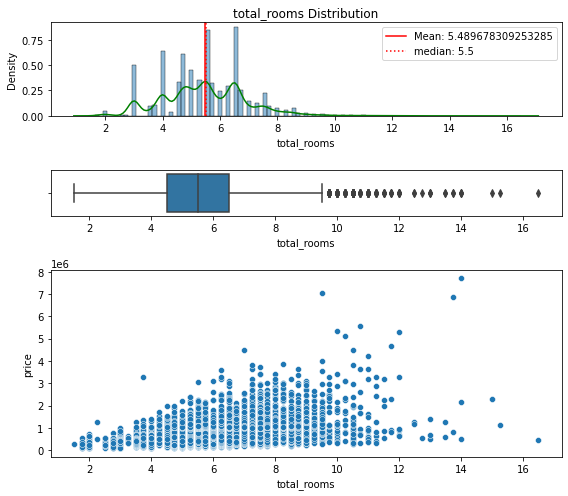

In [44]:
distr_(df, 'total_rooms')

- Distribution is not normal
- Looks like there are a significant number of outliers to the right of the upper IQR threshold
- Initially looks like there is a positive linear relationship wiht price

## Backyard Size as a proportion of the total lot
- Use sqft_above/sqft_lot as a proxy for backyard size
- Essentially, we are capturing how big the home is compared to the lot
- A larger value means a relatively smaller backyard and vice versa

In [45]:
# Divide sqft_living/sqft_lot
# Using sqft_above as opposed to sqft_living because living includes basement which we removed from our dataset

df['live_lot'] = df['sqft_above']/df['sqft_lot']

Live_lot Summary
Median: 0.20274485339987525
Mean: 0.2808
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2426


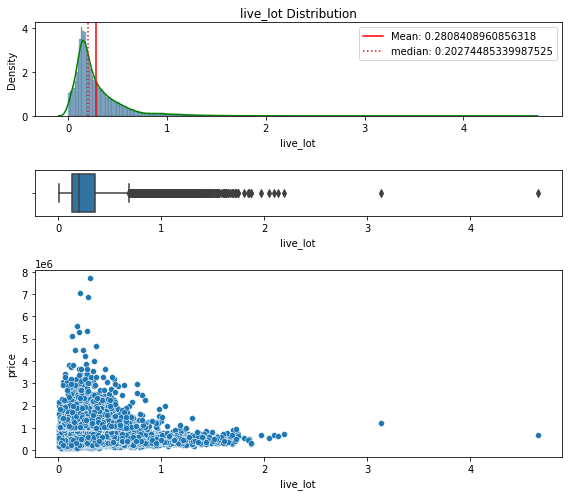

In [46]:
distr_(df, 'live_lot')

- Data is right skewed
- Significant number of outliers to the right of the upper IQR threshold
- Values may be greater than 1 because the living space can be greater than the lot space in the event that a house is built on a small lot and has many floors. In other words, it has a lot of sqft footage on the inside because it goes up vertically

## Comparison of Square Foot living and Lot vs Neighbors

- Sqft_living15 represents the average living space of the 15 nearest neighbors
- Would like to compare how the living space of the observed home compares to the neighbors

In [47]:
# SQF_living compared to neighbors
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

Living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


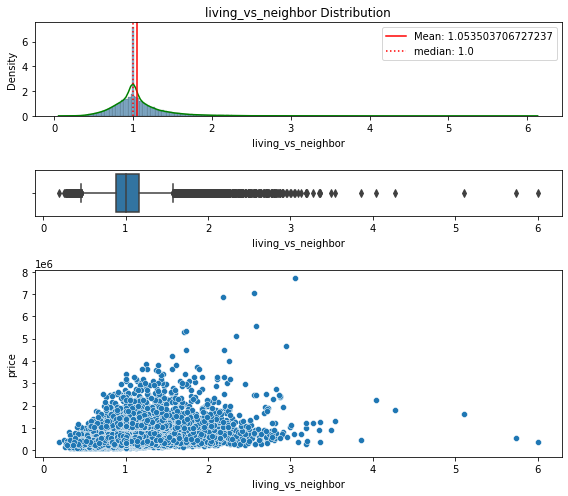

In [48]:
distr_(df, 'living_vs_neighbor')

- Data looks pretty normally distributed because mean and median are very close
- Outliers to the right of the upper threshold
- Unclear if there is a linear relationship with price
- A lot of the much larger homes in comparison to the neighbors actually have a negative relationship with price

- Sqft_lot15 represents the average living space of the 15 nearest neighbors
- Would like to compare how the lot size of the observed home compares to the neighbors

In [49]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

Lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


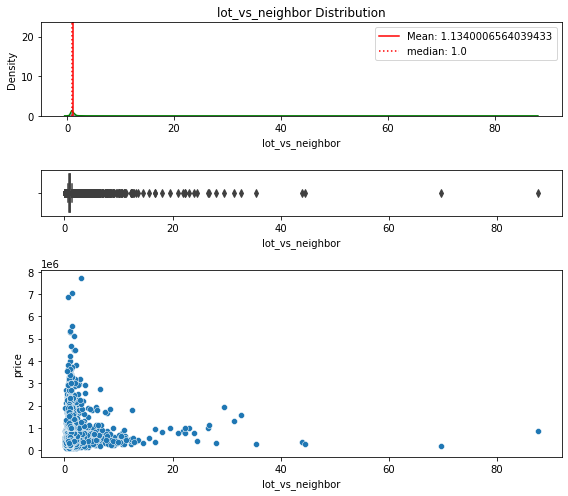

In [50]:
distr_(df, 'lot_vs_neighbor')

- Hard to tell distribution because there are clearly significant outlier values
- There are values greater than 80 which seem unreasonable unless there is a neighborhood with apartments and one extremely large home
- Linearity seems unlinkely because as lot_vs_neighbor increases, the change in price is not constant

# Check Assumptions of Linearity and Multicollinearity

- For the model to provide acccurate inferences, it must meet assumptions of linearity and multicollinearity

## Check Assumption of Linearity

- There must be a linear relationship between the predictor variable and target variable
    - In our case, the predictor variable refers to the home features and the target refers to price
- By linear relationship, we mean that as the x-value increases, the y-value must change by a constant amount
- If we do not meet assumption of linearity, our model will not accuratly infer home prices
- Must check each predictor that we are we going to include in the model

In [51]:
def lin_check(df, cols, ncols=4, figsize=(20,15)):
    """
    Produces regplot for each feature against price
    """
    if ncols%4==0:
        fig, axes = plt.subplots(nrows=(len(cols)//ncols), ncols=ncols, figsize=figsize)
        for ax, col in zip(axes.flatten(), cols):
            sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
            ax.set_title(f'{col} vs. price')
        fig.tight_layout()
    else:        
        fig, axes = plt.subplots(nrows=(len(cols)//ncols)+1, ncols=ncols, figsize=figsize)
        for ax, col in zip(axes.flatten(), cols):
            sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
            ax.set_title(f'{col} vs. price')
        fig.tight_layout()

In [52]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor'],
      dtype='object')

In [53]:
# Choosing to remove latitude and longitude from predictor variables because zip code 
# is a sufficient proxy for location. Additionally, for matters of interpretability, it
# will be easier for residents to understand zip code recommendations as opposed to lat/long

cols_to_check = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode','sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor']

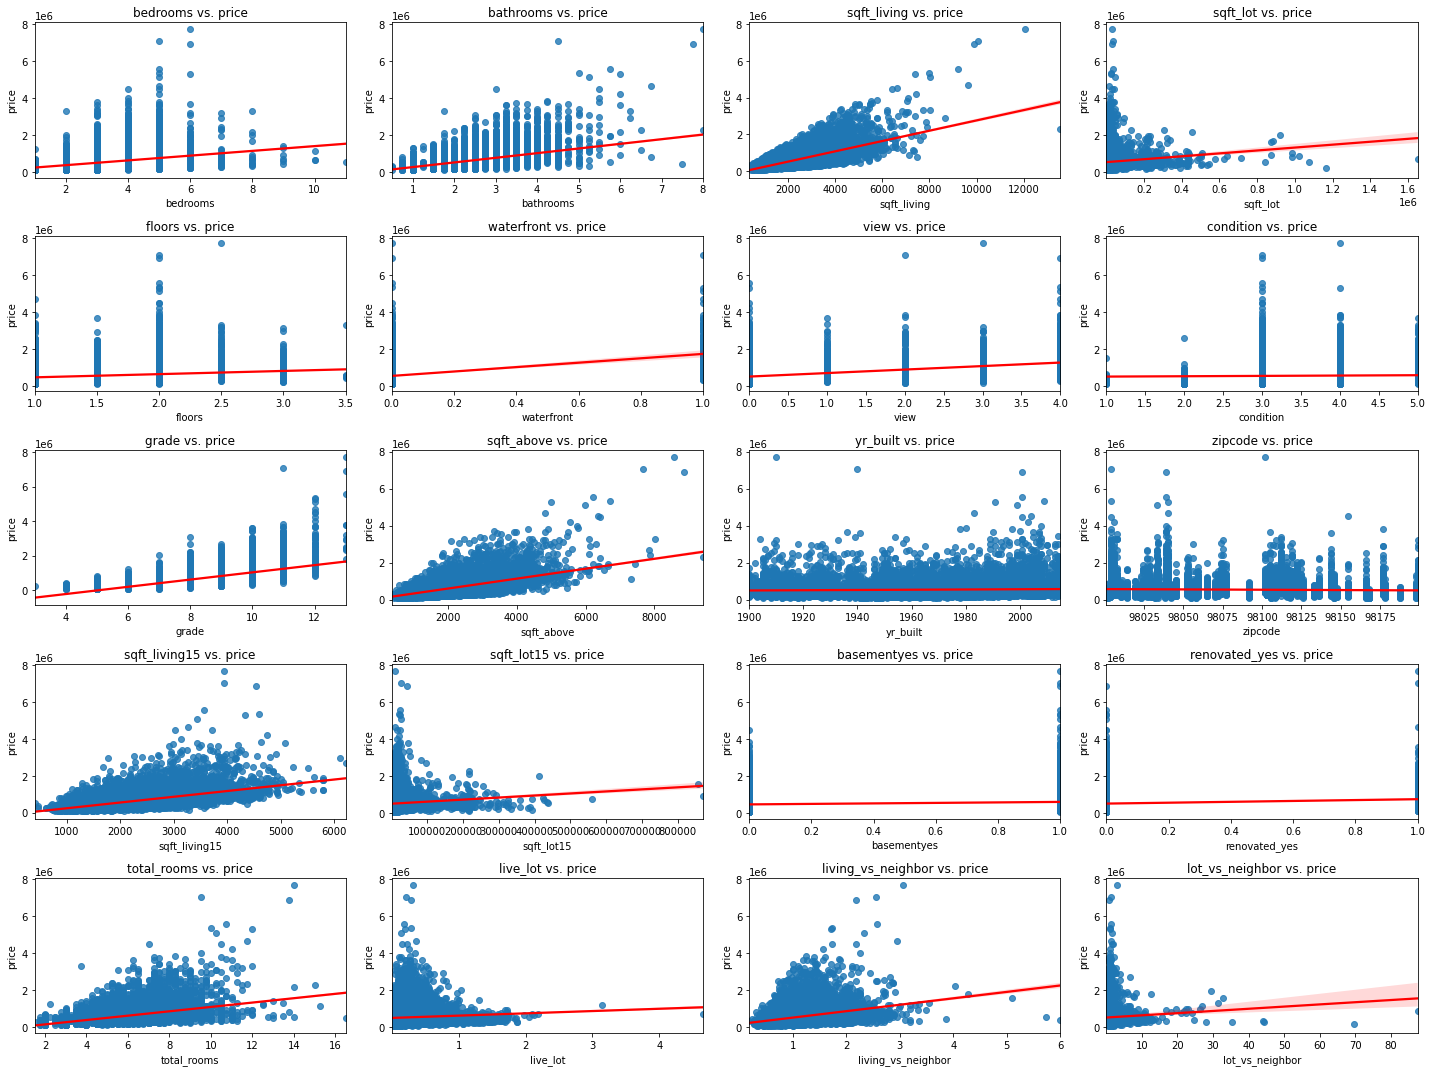

In [54]:
# Checking for linearity between predictor values and price

lin_check(df, cols_to_check)

The following cells do not have a linear relationship with price:
- Sqft_lot
- Floors (categorical)
- View (categorical)
- Condition (categorical)
- Yr_built
- Zip code (categorical)
- Basementyes (categorical)
- Renovatedyes (categorical)
- Sqft_lot15
- Live_lot

Sqft_lot, Yr_built, sqft_lot15, and live_lot are numeric variables that very clearly do not have a linear relationship with price. Of the categorical variables that do not have a linear relationship with price, will proceed by creater bar plots to evaluate their relationship with price. If there is not a clear linear relationship with price, I will One Hot Encode them

In [55]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'renovated_yes', 'total_rooms', 'live_lot',
       'living_vs_neighbor', 'lot_vs_neighbor'],
      dtype='object')

In [56]:
# These were continuous variables that do not have a linear relationship with price

cols_to_drop = ['sqft_lot', 'sqft_lot15', 'live_lot', 'yr_built']
df_lin = df.drop(cols_to_drop, axis=1)

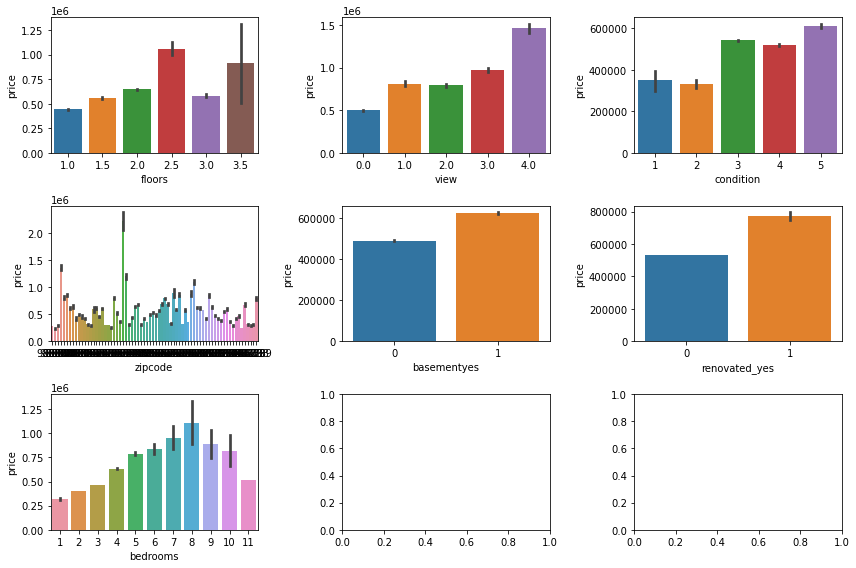

In [57]:
# Checking if categorical variables appear to have a linear relationship with price

cat_bars = ['floors', 'view', 'condition', 'zipcode', 'basementyes', 'renovated_yes', 'bedrooms']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
for ax, col in zip(axes.flatten(), cat_bars):
    sns.barplot(data=df, x=col, y='price', ax=ax, ci=68)
    fig.tight_layout()
    

- Floors, and zipcode do not have linear relationships with price
- Condition is close, but roughly has a linear relationship with price
- Will turn floors, zip code, and bedrooms into OHE variables to see if they make an impact on the model

**Conclusion:**
- Will be dropping: Sqft_lot, Yr_built, sqft_lot15, and live_lot are numeric
- Will be One Hot Encoding: Floors, zipcode, and bedrooms

## Check Assumption of Multicollinearity

For a multiple linear regression model to be accurate, it must meet the assumption that the predictor variables do not have multicollinearity. This means that not only should the predictors have a linear relationship with target, but they should not have a linear relationship with each other. In essense, if two variables move very close together, then they are redundant for inferential capabilities and may make it confusing to interpret which variable is contributing to the change in predictor values

RoadMap for checking assumptions of multicollinearity
1. Run initial check of correlation with price
2. Observe heatmap triangle to see which predictors have strong correlation with each other and price
3. Build table to show which variables have a correlation of greater than 0.75 with each other
    - 0.75 is the norm for determing if predictor values have muliticollinearity

In [58]:
# Check correlation with price

def initial_corr_check(df, col='price'):
    return df.corr()['price'].round(2).sort_values(ascending=False)

In [59]:
initial_corr_check(df_lin.drop(columns='id'))

price                 1.00000
sqft_living           0.70000
grade                 0.67000
sqft_above            0.60000
sqft_living15         0.58000
bathrooms             0.53000
total_rooms           0.47000
view                  0.39000
bedrooms              0.32000
lat                   0.31000
living_vs_neighbor    0.30000
waterfront            0.27000
floors                0.25000
basementyes           0.18000
renovated_yes         0.12000
lot_vs_neighbor       0.04000
condition             0.03000
long                  0.02000
zipcode              -0.05000
Name: price, dtype: float64

Initial correlation check shows that sqft_living, grade, and sqft_above have the most positive linear relationship with price

In [60]:
# Reference: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

def corr_triangle(df):
    """
    Correlation heatcamp, including price
    """
    corr2 = df.corr()
    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

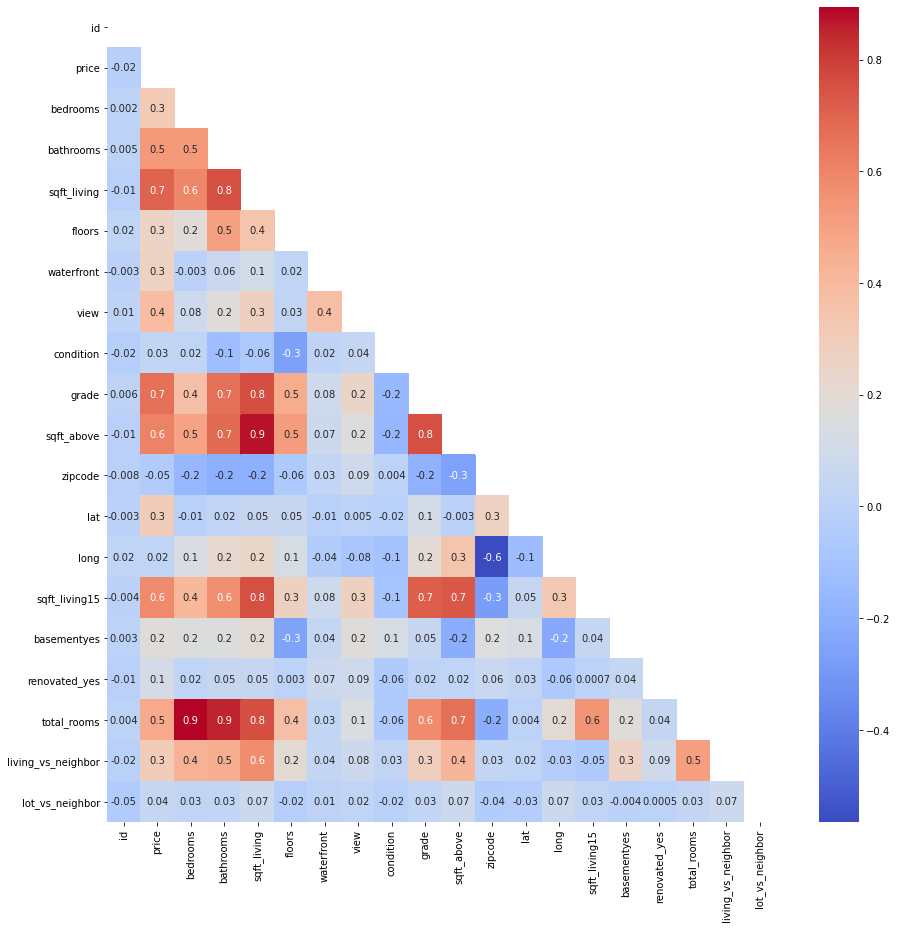

In [61]:
corr_triangle(df_lin)

There are a number of features that have strong multicollinearity. This is partially due to feature engineering and transforming existing columns to produce new columns
- Total rooms correlates strongly with bedrooms and bathrooms because that is how it was developed
- Sqft_living and sqft_living 15 are strongly correlated
- Sqft_living and sqft_above and grade are strongly correlated
    - Because sqft_living and sqft_above will be the same for homes that do not have basements

In [62]:
# Reference:https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

def corr_finder(df):
    """
    Shows pairs of features that have a correlation of greater than 0.75 with
    each other
    """
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [63]:
corr_finder(df_lin)

,cc
pairs,
"(total_rooms, bedrooms)",0.89510
"(sqft_living, sqft_above)",0.87655
"(bathrooms, total_rooms)",0.85186
"(total_rooms, sqft_living)",0.76392
"(sqft_living, grade)",0.76243
"(sqft_living15, sqft_living)",0.75630
"(grade, sqft_above)",0.75610
"(bathrooms, sqft_living)",0.75581


Methodology to handle collinearity:
- For each pair, drop the feature that has the lower correlation with price
    - Maintaining the feature that has a stronger relationship with price
        - Bedrooms & Total_Rooms: Drop Total Rooms because it has multicollinearity with many other features an reduces the nuance of the difference between suggesting adding either bedrooms or bathrooms
        - Sqft_living & Sqft_above: Drop Sqft_above because lower correlation with price. Additionally sqft_living included basement which we have now represented with a binary variable. Nuance of the basement is not lost
        - Total_Rooms and Bathrooms: Already eliminated Total_Rooms
        - Total_Rooms and Sqft_living: Already eliminated both features
        - Sqft_living15 and Sqft_living: Already eliminated sqft_living
        - Sqft_above and grade: Electing to keep because they represent very different features
        - Sqft_living and bathrooms: Already dropped sqft_living

In [64]:
cols_to_drop = ['total_rooms', 'sqft_above', 'bathrooms', 'sqft_living15']
df_linco = df_lin.drop(cols_to_drop, axis=1)

In [65]:
# Confirm no multicollinearity issues except for sqft_living and grade
# Elected to keep because they represent very different predictions

corr_finder(df_linco)

,cc
pairs,
"(grade, sqft_living)",0.76243


Our model is now closer to meeting all the necessary assumptions to provide accurate inferences. 

Next steps will be to handle outliers and then categorical variables 

# Model 1: Baseline Model
- Now that assumptions of linearity and no multicollinearity have been met, going to run a baseline OLS model
- Mainly observing R squared, Adjusted R squared, QQ Plot, and Homoskedacicity model
- Will check if certain variables are statistically insignificant based on their P-Value but will not be dropping variables because we have not yet handled outliers

What is R^2, Adjusted R^2, QQ Plot, and Homoskedacicity?

    - R^2: Indicated how much variance in the dependent variable is explained by the independent variable. This is our 'goodness of fit' test. The higher the value (between 0-1), the better our model does at explaining the variance of the dependent model
    
    - Adjusted R^2: Similar to R squared however it accounts for the number of independent variables. In other words, it has a downward biance as the number of independent variables increases.
    
    - Homoskedacicity: For our model to be accurate, it must meet the assumption of homoskedacicity. This means that our residuals (actual value-predicted value) cannot deviate accross different independent variables. The variance shuld not have a recognizable pattern
    
    - QQ Plot: Helps us measure homoskedacicity. Want to see the dots follow the 45 degree line. Shows us where the variance becomes non-uniform
    
    
    
    
    
Ref: https://statisticsbyjim.com/regression/interpret-r-squared-regression/

In [66]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [67]:
def model_summary(df, X_targets, y, qq=True):
    '''
    Produces OLS Linear Regression summary. True/False toggles if the QQ
    plot is displayed below the summary
    '''
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    display(model.summary())
    if qq==True:
        
        sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    
    return model

In [68]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


def sked_show(df, X_cols, lr=None, val='price'):
    '''
    Produces scatter plot showing measue of homoskedacicity
    '''
    if lr is None:
        lr = LinearRegression()
        lr.fit(df[X_cols], df[val])

        y_hat = lr.predict(df[X_cols])
    else:
        y_hat = lr.predict(df)

    
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

In [69]:
# Begin by using all columns as predictor values. Establishing a baseline model to then further iterate on

x_targs = ['bedrooms', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'zipcode',
       'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'sqft_living']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2883.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:48   Log-Likelihood:            -2.9411e+05
No. Observations:               21387   AIC:                         5.882e+05
Df Residuals:                   21374   BIC:                         5.884e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.254e+07   3.07e+06    -17.129      0.000   -5.86e+07   -4.65e+07
bedrooms           -3.239e+04   2204.113    -14.694      0.000   -3.67e+04   -2.81e+04
floors             -3302.0105   3555.724     -0.929      0.353   -1.03e+04    3667.475
waterfront          6.124e+05   2.05e+04     29.829      0.000    5.72e+05    6.53e+05
view                4.962e+04   2361.401     21.012      0.000     4.5e+04    5.42e+04
condition           6.098e+04   2514.696     24.248      0.000     5.6e+04    6.59e+04
grade               9.624e+04   2284.261     42.133      0.000    9.18e+04    1.01e+05
zipcode              528.9805     31.267     16.918      0.000     467.695     590.266
basementyes         2.791e+04   3651.532      7.643      0.000    2.08e+04    3.51e+04
renovated_yes       1.524e+05   8613.485     17.697      0.000    1.36e+05    1.69e+05
living_vs_neighbor -1.008e+05   6466.963    -15.591      0.000   -1.13e+05   -8.81e+04
lot_vs_neighbor      716.1896   1216.573      0.589      0.556   -1668.385    3100.764
sqft_living          213.4715      3.621     58.950      0.000     206.374     220.569
==============================================================================
Omnibus:                    15558.225   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           926735.693
Skew:                           2.918   Prob(JB):                         0.00
Kurtosis:                      34.716   Cond. No.                     1.94e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

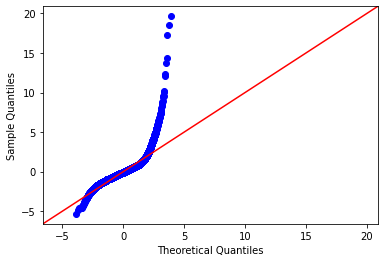

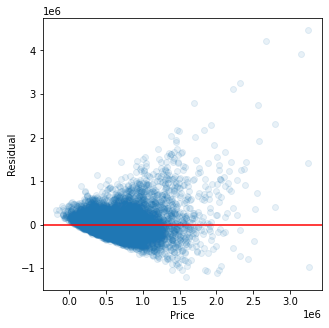

In [70]:
model_base = model_summary(df_linco, x_targs, 'price')
sked_show(df, x_targs, model_base)

**Conclusions**
- R^2: 0.618
- Adjusted R^2: 0.618
- QQ Plot: Deviates upwards at the 2nd/3rd quantile. Suggests we have high outlier values that the model is failing to explain
- Homoskedacicity: Becomes cone shaped aournd $1.25 million. Suggests outlier values
- Non-Statistically Significant Preditors: Floors, lot_vs_neighbor
- Not dropping non-statistically significant values yet because they may have a significant relationship with price when we remove outlier values

# Outlier Removal: IQR + Z-Score
- Due to high outliers shown in the QQ Plot, next step is to remove outliers
- Will try using Z-Score and IQR method
- Will evaluate data loss to determine which methodology I will pursue for modeling purposes

## IQR Method
- The IQR method uses quantiles to determine if a value is considered an outlier
- The process:
    1. Determine IQR which is calcuated as Quantile 3 - Quantile 1
    2. Upper Thresh: Quantile 3 * 1.5 *IQR
    3. Lower Thresh: Quantile 1 * 1.5 * -IQR
    4. Any values outside of the upper and lower thresholds are considered outlier values

- This method is more strict for evaluating outliers than Z-Score

### IQR Method Accross All Columns
- In this approach, we are going to classify outlier observations as those with at least one outlier accross all features
- For example, if an observation is has bedrooms which are an outlier, it will be removed from the dataset
- This method is more strict for determining outliers
- CAUTION: we may have significant data loss

In [71]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [72]:
df_linco.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor'],
      dtype='object')

In [73]:
# Cols we are going to check with the IQR method
# Do not perform IQR check on binary variables or categorical variables like view and grade

iqr_check = ['price', 'bedrooms',
             'sqft_living',
            'living_vs_neighbor', 'lot_vs_neighbor']


In [74]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_linco[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr = df_linco[~iqr_outliers['total']].copy()

In [75]:
# Confirm that our data looks correct in terms of columns

df_iqr.head()

,id,date,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
0,7129300520,2014-10-13,221900.00000,3,1180,1.00000,0.00000,0.00000,3,7,98178,47.51120,-122.25700,0,0,0.88060,1.00000
1,6414100192,2014-12-09,538000.00000,3,2570,2.00000,0.00000,0.00000,3,7,98125,47.72100,-122.31900,1,1,1.52071,0.94803
3,2487200875,2014-12-09,604000.00000,4,1960,1.00000,0.00000,0.00000,5,7,98136,47.52080,-122.39300,1,0,1.44118,1.00000
4,1954400510,2015-02-18,510000.00000,3,1680,1.00000,0.00000,0.00000,3,8,98074,47.61680,-122.04500,0,0,0.93333,1.07690
6,1321400060,2014-06-27,257500.00000,3,1715,2.00000,0.00000,0.00000,3,7,98003,47.30970,-122.32700,0,0,0.76631,1.00000


In [76]:
df_iqr.describe()

,id,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000
mean,4734745636.78559,467032.92775,3.30546,1924.12284,1.46378,0.00097,0.14333,3.40743,7.53176,98076.03244,47.55523,-122.20885,0.35276,0.02397,0.99537,0.99854
std,2878922190.79975,200357.29212,0.76801,696.80695,0.53187,0.03112,0.57948,0.63666,0.98427,53.05455,0.14311,0.13984,0.47785,0.15297,0.20094,0.11302
min,1200019.00000,81000.00000,2.00000,560.00000,1.00000,0.00000,0.00000,1.00000,4.00000,98001.00000,47.17640,-122.50700,0.00000,0.00000,0.46341,0.70212
25%,2297400055.00000,310000.00000,3.00000,1400.00000,1.00000,0.00000,0.00000,3.00000,7.00000,98032.00000,47.45255,-122.32500,0.00000,0.00000,0.87606,0.94829
50%,4046710050.00000,429000.00000,3.00000,1820.00000,1.00000,0.00000,0.00000,3.00000,7.00000,98059.00000,47.56620,-122.21800,0.00000,0.00000,1.00000,1.00000
75%,7504400730.00000,586750.00000,4.00000,2360.00000,2.00000,0.00000,0.00000,4.00000,8.00000,98117.00000,47.68180,-122.12000,1.00000,0.00000,1.09658,1.03527
max,9900000190.00000,1120000.00000,5.00000,4230.00000,3.50000,1.00000,4.00000,5.00000,12.00000,98199.00000,47.77760,-121.31900,1.00000,1.00000,1.58065,1.32779


With the new DataFrame, the range of values has been constrained to the following:
- Price
    - Min: $81,000
    
    - Max: $1,120,000
- Bedrooms
    - Min: 2
    - Max: 5
- Floors
    - Min: 1
    - Max: 3.5

- Sqft_Living
    - Min: 560
    - Max: 4230
    
This constrains our dataset to only be able to provide inferential capabilities for the above types of homes. The min and max price seem accurate because the QQ Plot was trailing off aroun $1.25 million

In [77]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_iqr):,}')
print(f'Num observations removed: {len(df)-len(df_iqr):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_iqr))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 15,475
Num observations removed: 5,912
Num observations removed as percent of original DF: 27.64%


With this type of outlier removal we have significant data loss. Aprox. 28% of our data will not be included for modeling purposes. Going to see how the model performs with these constraints

#### Model 2: IQR All Outliers Removed
- Check to see if assumption of homoskedacicity has improved
- Check if significant p-values has changed

In [78]:
# Ensure our DataFrame only includes non outlier values

df_iqr.describe()

,id,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000,15475.00000
mean,4734745636.78559,467032.92775,3.30546,1924.12284,1.46378,0.00097,0.14333,3.40743,7.53176,98076.03244,47.55523,-122.20885,0.35276,0.02397,0.99537,0.99854
std,2878922190.79975,200357.29212,0.76801,696.80695,0.53187,0.03112,0.57948,0.63666,0.98427,53.05455,0.14311,0.13984,0.47785,0.15297,0.20094,0.11302
min,1200019.00000,81000.00000,2.00000,560.00000,1.00000,0.00000,0.00000,1.00000,4.00000,98001.00000,47.17640,-122.50700,0.00000,0.00000,0.46341,0.70212
25%,2297400055.00000,310000.00000,3.00000,1400.00000,1.00000,0.00000,0.00000,3.00000,7.00000,98032.00000,47.45255,-122.32500,0.00000,0.00000,0.87606,0.94829
50%,4046710050.00000,429000.00000,3.00000,1820.00000,1.00000,0.00000,0.00000,3.00000,7.00000,98059.00000,47.56620,-122.21800,0.00000,0.00000,1.00000,1.00000
75%,7504400730.00000,586750.00000,4.00000,2360.00000,2.00000,0.00000,0.00000,4.00000,8.00000,98117.00000,47.68180,-122.12000,1.00000,0.00000,1.09658,1.03527
max,9900000190.00000,1120000.00000,5.00000,4230.00000,3.50000,1.00000,4.00000,5.00000,12.00000,98199.00000,47.77760,-121.31900,1.00000,1.00000,1.58065,1.32779


In [79]:
x_targs = df_iqr.columns
x_targs = list(x_targs)
x_targs = [x for x in x_targs if x not in ('id', 'date', 'price')]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2303.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:48   Log-Likelihood:            -2.0216e+05
No. Observations:               15475   AIC:                         4.043e+05
Df Residuals:                   15460   BIC:                         4.045e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.777e+07   1.84e+06    -15.108      0.000   -3.14e+07   -2.42e+07
bedrooms           -8472.8199   1525.406     -5.554      0.000   -1.15e+04   -5482.845
sqft_living          134.7622      2.678     50.328      0.000     129.514     140.011
floors               1.37e+04   2184.062      6.273      0.000    9419.236     1.8e+04
waterfront          1.016e+05   3.01e+04      3.373      0.001    4.26e+04    1.61e+05
view                3.655e+04   1686.343     21.674      0.000    3.32e+04    3.99e+04
condition           4.756e+04   1535.022     30.983      0.000    4.46e+04    5.06e+04
grade               5.888e+04   1520.542     38.722      0.000    5.59e+04    6.19e+04
zipcode             -119.1025     21.897     -5.439      0.000    -162.022     -76.183
lat                 5.857e+05   6849.178     85.512      0.000    5.72e+05    5.99e+05
long               -9.245e+04   8475.166    -10.909      0.000   -1.09e+05   -7.58e+04
basementyes          1.76e+04   2287.099      7.694      0.000    1.31e+04    2.21e+04
renovated_yes       9.912e+04   6055.472     16.368      0.000    8.72e+04    1.11e+05
living_vs_neighbor -1.105e+05   5856.715    -18.869      0.000   -1.22e+05    -9.9e+04
lot_vs_neighbor     3044.9759   8182.017      0.372      0.710    -1.3e+04    1.91e+04
==============================================================================
Omnibus:                     1495.077   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2626.118
Skew:                           0.679   Prob(JB):                         0.00
Kurtosis:                       4.494   Cond. No.                     1.97e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

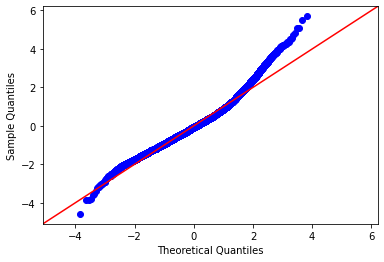

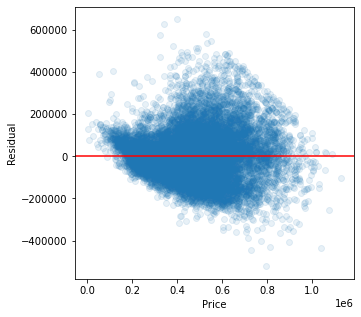

In [80]:
model_iqra = model_summary(df_iqr, x_targs, 'price')
sked_show(df_iqr, x_targs, model_iqra)

**Conclusions**
- R^2: 0.676
- Adjusted R^2: 0.676
- QQ Plot: Meets assumption but treads up slightly after the 2nd quantile. Scale on sample quantiles is -4 to 6 which is passable. To perfectly meet assumption the scale would be -4 to 4
- Homoskedacicity: No cone shape, passes assumptions. Possibly slight cone shape as data moves towards $800,000. Significant improvement from baseline model
- Non-Statistically Significant Preditors: lot_vs_neighbor
- Not going to use this model because there is too much data loss

### IQR Price Outliers Removed
- Rather than considering an observation an outlier solely based on one feature, we are only considering an observation to be an outlier if price is an outlier
- This method reduces data loss because we are less strict on classifying outliers

In [81]:
# Finding the upper bound of the price threshold for outliers
# Since prices cannot be negative, we are not concerned with the lower bound

res=df_linco['price'].describe()
thresh = res['75%'] -res['25%']
u_bound=res['75%']+1.5*thresh
u_bound

1125564.75

Maximum price for this model will be $1,125,564

In [82]:
# Subsetting the data to only include values below the upper threshold that we have established

df_iqrp = df_linco[df_linco['price'] <=u_bound]

In [83]:
# Ensure that observations have been dropped 

print(len(df_iqrp))
print(df_iqrp['price'].max())

20235
1120000.0


Confirmed that we have less data than the original DataFrame

In [84]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_iqrp):,}')
print(f'Num observations removed: {len(df)-len(df_iqrp):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_iqrp))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 20,235
Num observations removed: 1,152
Num observations removed as percent of original DF: 5.39%


With this type of outlier removal we have much lower data loss. Aprox. 5% of our data will not be included for modeling purposes. Going to see how the model performs with these constraints. 

Compared to removing values based on a single feature determinig an observation as an outlier, this method preserves far more data for our model. This means that our model can provide inferences for a wider range of homes which is valuable for our purposes.

In [85]:
max_ip = df_iqrp['price'].max()
min_ip = df_iqrp['price'].min()

print(f'Min Price: ${min_ip:,}')
print(f'Max Price: ${max_ip:,}')

Min Price: $78,000.0
Max Price: $1,120,000.0


Our model provides inferential capabilities for homes priced between \\$78,000 and \\$1,120,000

#### Model 3: IQR Price Outliers Removed
- Considering an observation an outlier if price is above threshold
- This method reduces data loss compared to previous model because we are less strict on classifying outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2896.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:49   Log-Likelihood:            -2.6522e+05
No. Observations:               20235   AIC:                         5.305e+05
Df Residuals:                   20220   BIC:                         5.306e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.723e+07   1.67e+06    -16.304      0.000   -3.05e+07    -2.4e+07
bedrooms           -7627.4038   1221.868     -6.242      0.000      -1e+04   -5232.444
sqft_living          121.3012      2.212     54.847      0.000     116.966     125.636
floors              1.412e+04   1936.055      7.293      0.000    1.03e+04    1.79e+04
waterfront          1.211e+05   1.76e+04      6.880      0.000    8.66e+04    1.56e+05
view                3.667e+04   1428.352     25.676      0.000    3.39e+04    3.95e+04
condition            4.31e+04   1374.848     31.352      0.000    4.04e+04    4.58e+04
grade               6.184e+04   1288.038     48.009      0.000    5.93e+04    6.44e+04
zipcode             -134.2122     20.068     -6.688      0.000    -173.548     -94.877
lat                 5.895e+05   6321.978     93.251      0.000    5.77e+05    6.02e+05
long               -9.848e+04   7632.839    -12.902      0.000   -1.13e+05   -8.35e+04
basementyes         1.008e+04   2030.602      4.962      0.000    6095.958    1.41e+04
renovated_yes       8.853e+04   4918.509     18.000      0.000    7.89e+04    9.82e+04
living_vs_neighbor -6.305e+04   3695.609    -17.062      0.000   -7.03e+04   -5.58e+04
lot_vs_neighbor     4833.7807    678.485      7.124      0.000    3503.894    6163.667
==============================================================================
Omnibus:                     1847.605   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3189.742
Skew:                           0.655   Prob(JB):                         0.00
Kurtosis:                       4.438   Cond. No.                     1.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

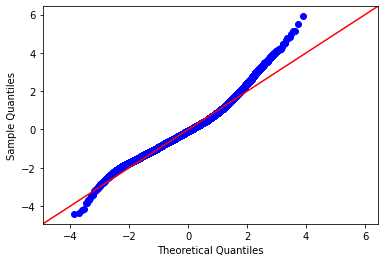

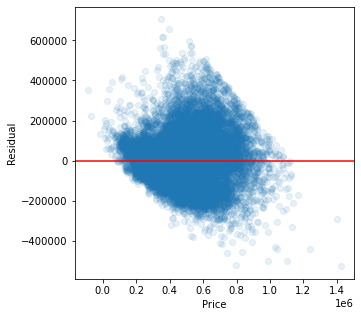

In [86]:
model_iqrp = model_summary(df_iqrp, x_targs, 'price')
sked_show(df_iqrp, x_targs, model_iqrp)

**Conclusions**
- R^2: 0.667
- Adjusted R^2: 0.667
- QQ Plot: Meets assumption but treads up slightly after the 2nd quantile. Scale on sample quantiles between -4 and 6
- Homoskedacicity: No cone shape, passes assumptions. 
- Non-Statistically Significant Preditors: None
- This model is highly preferable to removing all columns because all assumptions can be met and our data loss is much less significant. Can provide a wider range of inferences

## Z-Score Method

- Z-score outlier removal is another method for classifying data as outliers
- To begin we standardize our values as z scores. This means that we are going to transform the data so that it has a mean of 0 and a standard deviation of 1. This allows us to compare different features without having to worry about differences in magnitude or units
- We will not standardize Boolean values
- From there, determine if a value is an outlier based on having a z-score greater than or less than 3
    - This rule of thumb comes from the empirical rule which states that 99.7% of observations will lay between 0 and 3 standard deviations from the mean
    - Essentially, we are classifying a vale as an outlier if it is in the 0.03% quintile
- This method is less strict at classifying outliers than IQR method

### Z-Score Method Accross All Columns
- In this approach, we are going to classify outlier observations as those with at least one outlier accross all features
- For example, if an observation is has bedrooms which are an outlier, it will be removed from the dataset
- This method is more strict for determining outliers
- CAUTION: we may have significant data loss

In [87]:
# Create scaler object

scaler = StandardScaler()
scaler

StandardScaler()

In [88]:
# Create new DF to prepare for fit and transform

df_z = df_linco.copy()

In [89]:
df_z.columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'basementyes', 'renovated_yes', 'living_vs_neighbor',
       'lot_vs_neighbor'],
      dtype='object')

In [90]:
# Not scaling binary variables such as waterfront, renovated, and basement
# Binary Variables are already encoded and will not have outlier values because they are
# 0 or 1 
# Note: Scaling does not actually change values relative to each other, just changes mean and SD

cols_to_scale = ['price', 'bedrooms', 'floors',
       'view', 'condition', 'grade', 'sqft_living',
       'living_vs_neighbor',
       'lot_vs_neighbor']

In [91]:
# Fit and transform original values into scaled values

df_z[cols_to_scale] = scaler.fit_transform(df_z[cols_to_scale])
df_z.describe()

,id,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000
mean,4581721940.59443,0.00000,0.00000,-0.00000,-0.00000,0.00678,0.00000,-0.00000,0.00000,98077.87418,47.56007,-122.21373,0.38500,0.03451,-0.00000,0.00000
std,2876772841.46664,1.00002,1.00002,1.00002,1.00002,0.08206,1.00002,1.00002,1.00002,53.47983,0.13864,0.14083,0.48661,0.18253,1.00002,1.00002
min,1000102.00000,-1.26066,-2.62718,-1.86373,-0.91774,0.00000,-0.30530,-3.71072,-3.97935,98001.00000,47.15590,-122.51900,0.00000,0.00000,-2.70489,-0.83891
25%,2124049194.50000,-0.58940,-0.41185,-0.70992,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,98033.00000,47.47080,-122.32800,0.00000,0.00000,-0.53600,-0.15331
50%,3904930240.00000,-0.24815,-0.41185,-0.17655,0.00814,0.00000,-0.30530,-0.63136,-0.56451,98065.00000,47.57190,-122.23000,0.00000,0.00000,-0.16707,-0.10418
75%,7309100170.00000,0.28260,0.69582,0.50921,0.93402,0.00000,-0.30530,0.90831,0.28920,98117.00000,47.67810,-122.12400,1.00000,0.00000,0.33705,-0.03167
max,9900000190.00000,19.48493,8.44950,12.47185,3.71165,1.00000,4.93089,2.44799,4.55775,98199.00000,47.77760,-121.31500,1.00000,1.00000,15.44602,67.16793


As we can see, the columns that we have scaled have a mean of 0 and standard deviation of 1

In [92]:
# Create new DataFrame where we are only going to include values that we have scaled that have a Z-Score 
# less than 3 and greater than -3

outliers_z = pd.DataFrame()

for col in cols_to_scale:
    outliers_z[col] = df_z[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_za = df_z[~outliers_z['total']].copy()

In [93]:
print(len(df_za))
df_za.describe()

19735


,id,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000
mean,4608056409.49688,-0.14098,-0.05404,-0.11819,-0.02592,0.00030,-0.17324,0.00269,-0.08676,98077.54325,47.55930,-122.21233,0.36762,0.02909,-0.09307,-0.05976
std,2876186313.51690,0.64731,0.94099,0.83404,0.99458,0.01743,0.55036,0.98863,0.89522,52.99498,0.14007,0.14069,0.48217,0.16805,0.80793,0.29434
min,1000102.00000,-1.24841,-2.62718,-1.86373,-0.91774,0.00000,-0.30530,-2.17104,-2.27193,98001.00000,47.15590,-122.51900,0.00000,0.00000,-2.43218,-0.83891
25%,2140950145.00000,-0.61559,-0.41185,-0.74257,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,98033.00000,47.46565,-122.32700,0.00000,0.00000,-0.55491,-0.15490
50%,3918400013.00000,-0.27945,-0.41185,-0.25275,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,98065.00000,47.57060,-122.22700,0.00000,0.00000,-0.16707,-0.10418
75%,7334550735.00000,0.17373,0.69582,0.37858,0.93402,0.00000,-0.30530,0.90831,0.28920,98117.00000,47.67990,-122.12300,1.00000,0.00000,0.25490,-0.04284
max,9900000190.00000,2.99080,2.91116,2.98011,2.78577,1.00000,2.31279,2.44799,2.85033,98199.00000,47.77760,-121.31500,1.00000,1.00000,2.99458,2.93377


- We have created a new DataFrame that only includes observations where all scaled values fall between -3 and 3 Z-scores
- Our mean and SD are no longer (0,1) because we have removed outiers, however this makes sense given that we are trying to remove outliers
- In total, we now have 19,735 observations

In [94]:
# Formula that returns z-score back to original value

def z_to_value(z, mu=df['price'].mean(), sd=df['price'].std()):
    """
    Converts z-score to original value
    """
    x = sd*z+mu
    return round(x,2)

In [95]:
print(f'Max price: ${z_to_value(2.99):,}')
print(f'Min price: ${z_to_value(-1.24841):,}')

Max price: $1,639,733.25
Min price: $82,490.54


The model will be able to infer prices of homes between \\$82,490 and $1,639,733. This is a wider range of price constraints which makes sense because Z-score is less strict in terms of classifying outliers

In [96]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_za):,}')
print(f'Num observations removed: {len(df)-len(df_za):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_za))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 19,735
Num observations removed: 1,652
Num observations removed as percent of original DF: 7.72%


With this type of outlier removal our data loss is aprox 8%. Going to see how the model performs with these constraints. Check model to see if assumptions are met

This method will remove more data then when we only consider an observation an outlier based on price constraints

### Model 3: Z-Score All Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2734.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:49   Log-Likelihood:                -8773.8
No. Observations:               19735   AIC:                         1.758e+04
Df Residuals:                   19720   BIC:                         1.770e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -81.9507      5.385    -15.219      0.000     -92.505     -71.396
bedrooms              -0.0249      0.004     -6.775      0.000      -0.032      -0.018
sqft_living            0.3705      0.007     55.250      0.000       0.357       0.384
floors                 0.0162      0.003      4.762      0.000       0.010       0.023
waterfront             0.6130      0.155      3.962      0.000       0.310       0.916
view                   0.1000      0.005     19.771      0.000       0.090       0.110
condition              0.0888      0.003     30.751      0.000       0.083       0.094
grade                  0.2319      0.005     46.912      0.000       0.222       0.242
zipcode               -0.0006   6.47e-05     -9.042      0.000      -0.001      -0.000
lat                    1.6675      0.020     81.557      0.000       1.627       1.708
long                  -0.4903      0.025    -19.848      0.000      -0.539      -0.442
basementyes            0.0290      0.007      4.421      0.000       0.016       0.042
renovated_yes          0.2978      0.016     18.476      0.000       0.266       0.329
living_vs_neighbor    -0.0819      0.004    -18.459      0.000      -0.091      -0.073
lot_vs_neighbor        0.0457      0.009      4.909      0.000       0.027       0.064
==============================================================================
Omnibus:                     5210.929   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21272.001
Skew:                           1.256   Prob(JB):                         0.00
Kurtosis:                       7.423   Cond. No.                     1.96e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

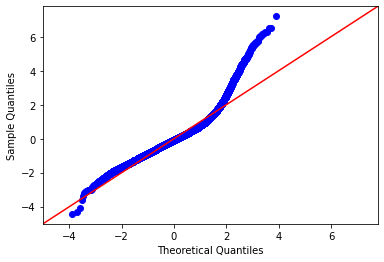

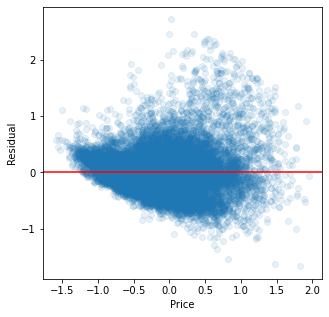

In [97]:
model_za = model_summary(df_za, x_targs, 'price')
sked_show(df_za, x_targs, model_za)

**Conclusions**
- R^2: 0.660
- Adjusted R^2: 0.660
- QQ Plot: Does not do a good job at meeting assumptions as residuals begin to trail off at 2nd quantile. Same scale but much more deviation towards 2nd quantile
- Homoskedacicity: Cone shaped, especially as model reaches Z-score of 0.75
- Non-Statistically Significant Preditors: None
- Model does not meet all 4 assumptions, however data loss is better than IQR all drop

### Z-Score Price Outliers Removed
- Rather than considering an observation an outlier solely based on one feature, we are only considering an observation to be an outlier if price is an outlier
- This method reduces data loss because we are less strict on classifying outliers
- Will be using same scaled data from previous model but only looking at price column

In [98]:
# Check to see if we have values greater than 3 and less than 3 in the price column
# Only need to worry about values greater than 3

df_z.describe()

,id,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
count,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000,21387.00000
mean,4581721940.59443,0.00000,0.00000,-0.00000,-0.00000,0.00678,0.00000,-0.00000,0.00000,98077.87418,47.56007,-122.21373,0.38500,0.03451,-0.00000,0.00000
std,2876772841.46664,1.00002,1.00002,1.00002,1.00002,0.08206,1.00002,1.00002,1.00002,53.47983,0.13864,0.14083,0.48661,0.18253,1.00002,1.00002
min,1000102.00000,-1.26066,-2.62718,-1.86373,-0.91774,0.00000,-0.30530,-3.71072,-3.97935,98001.00000,47.15590,-122.51900,0.00000,0.00000,-2.70489,-0.83891
25%,2124049194.50000,-0.58940,-0.41185,-0.70992,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,98033.00000,47.47080,-122.32800,0.00000,0.00000,-0.53600,-0.15331
50%,3904930240.00000,-0.24815,-0.41185,-0.17655,0.00814,0.00000,-0.30530,-0.63136,-0.56451,98065.00000,47.57190,-122.23000,0.00000,0.00000,-0.16707,-0.10418
75%,7309100170.00000,0.28260,0.69582,0.50921,0.93402,0.00000,-0.30530,0.90831,0.28920,98117.00000,47.67810,-122.12400,1.00000,0.00000,0.33705,-0.03167
max,9900000190.00000,19.48493,8.44950,12.47185,3.71165,1.00000,4.93089,2.44799,4.55775,98199.00000,47.77760,-121.31500,1.00000,1.00000,15.44602,67.16793


In [99]:
# Create new DataFrame only containing observations where the price has a Z-Score less than 3

df_zp = df_z[df_z['price'] < 3]

In [100]:
# Confirm that data has been removed
# Confirm that max price is less than 3

print(len(df_za))
df_zp['price'].max()

19735


2.990795957515217

In [101]:
print(f'Max price: ${z_to_value(2.99):,}')
print(f'Min price: ${z_to_value(-1.26066):,}')

Max price: $1,639,733.25
Min price: $77,989.74


The model will be able to infer prices of homes between \\$77,989 and $1,639,733

In [102]:
print(f'Num observations before dropping with IQR: {len(df):,}')
print(f'Num observations after dropping with IQR: {len(df_zp):,}')
print(f'Num observations removed: {len(df)-len(df_zp):,}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df)-len(df_zp))/len(df))),2)}%')

Num observations before dropping with IQR: 21,387
Num observations after dropping with IQR: 20,983
Num observations removed: 404
Num observations removed as percent of original DF: 1.89%


With this type of outlier removal our data loss is aprox 2%. Going to see how the model performs with these constraints. Check model to see if assumptions are met

This method removes the least amount of data which makes sense for two reasons. First, it is only classifying outliers as those that have a price outlier value. Second, Z-Score outlier removal is more strict than IQR outlier removal

#### Model 4: Z-Score Price Outliers Removed
- Considering an observation an outlier if price is above threshold
- This method reduces data loss compared to previous model because we are less strict on classifying outliers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3269.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:49   Log-Likelihood:                -10259.
No. Observations:               20983   AIC:                         2.055e+04
Df Residuals:                   20968   BIC:                         2.067e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -79.8958      5.424    -14.730      0.000     -90.528     -69.264
bedrooms              -0.0267      0.004     -7.542      0.000      -0.034      -0.020
sqft_living            0.3624      0.006     57.164      0.000       0.350       0.375
floors                 0.0146      0.003      4.305      0.000       0.008       0.021
waterfront             0.5487      0.047     11.691      0.000       0.457       0.641
view                   0.0991      0.003     30.002      0.000       0.093       0.106
condition              0.0860      0.003     29.774      0.000       0.080       0.092
grade                  0.2411      0.005     50.040      0.000       0.232       0.251
zipcode               -0.0006   6.52e-05     -9.711      0.000      -0.001      -0.001
lat                    1.7002      0.021     81.776      0.000       1.659       1.741
long                  -0.4999      0.025    -20.061      0.000      -0.549      -0.451
basementyes            0.0215      0.007      3.271      0.001       0.009       0.034
renovated_yes          0.2953      0.016     19.038      0.000       0.265       0.326
living_vs_neighbor    -0.0637      0.004    -17.037      0.000      -0.071      -0.056
lot_vs_neighbor        0.0156      0.003      5.641      0.000       0.010       0.021
==============================================================================
Omnibus:                     4868.625   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17767.809
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       6.896   Cond. No.                     1.95e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

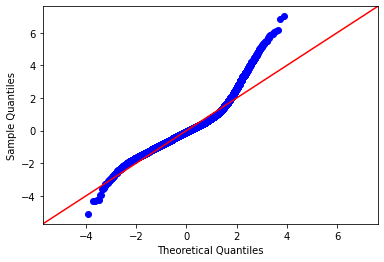

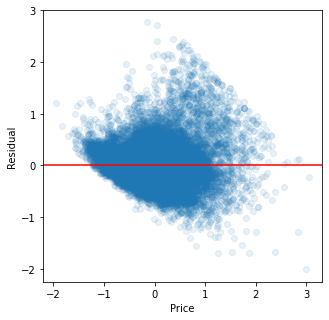

In [103]:
model_zp = model_summary(df_zp, x_targs, 'price')
sked_show(df_zp, x_targs, model_zp)

**Conclusions**
- R^2: 0.686
- Adjusted R^2: 0.686
- QQ Plot: Does not do a good job at meeting assumptions as residuals begin to trail off at 2nd quantile
- Homoskedacicity: Cone shaped, especially as model reaches Z-score of 0.75
- Non-Statistically Significant Preditors: Bathrooms and Floors
- Model does not meet all 4 assumptions, however data loss is **very** low

Unfortunately, this model is not sufficient because it does not meet the assumption of homoskedacicity

## Table to Compare 4 Outlier Removal Methods

- Want a simply way to evaluate all 4 models and conclude which outlier removal strategy is most effective

In [104]:
# Create DataFrame that compares all 4 outlier removal types

d = {
    'Outlier Type': ['IQR-All', 'IQR-Price', 'Z-All', 'Z-Price'],
    'Data Loss %':[27.6,5.4,7.7,1.9],
     'R^2':[0.676, 0.677, 0.660, 0.686],
    'Homoskedacicty':['Pass', 'Pass', 'Fail', 'Fail'],
    'QQ Plot':['Pass', 'Pass', 'Fail', 'Fail'],
    'Min Price':[81000, 78000.0, 82490, 77989],
    'Max Price':[1120000, 1120000, 1639733, 1639733]
    }
table_o = pd.DataFrame(d)
table_o.set_index('Outlier Type')

,Data Loss %,R^2,Homoskedacicty,QQ Plot,Min Price,Max Price
Outlier Type,,,,,,
IQR-All,27.60000,0.67600,Pass,Pass,81000.00000,1120000
IQR-Price,5.40000,0.67700,Pass,Pass,78000.00000,1120000
Z-All,7.70000,0.66000,Fail,Fail,82490.00000,1639733
Z-Price,1.90000,0.68600,Fail,Fail,77989.00000,1639733


As we can see, each outlier removal type creates varying degrees of data loss. Due to the constraints of linear regression, our model must pass the assumption of homoskedacicity. For that reason, I am going to rule out Z-Score outlier removal methodologies. When left with IQR-Price and IQR-All, choosing price makes far more sense because the dat loss is much lower and the R^2 is higher. Max/Min price are very close together

In conclusion, will move forward modeling with **IQR-Price**

# Handling Categorical Variables with One Hot Encoding
- Dummy variables (one hot encoded variables) must be used to handle categorical variables because otherwise we will run into problems of multicollinearity. In other words, one of the dummy variables will be dropped because it can be explained by all of the others
- Our next step is to One Hot Encode the ordinal variables in our model
- These variables, when evaluated from an ordinal perpsetive, did not have a linear relationship with price
- However, we will evaluate their P-Values to determine if they have statistical significance as categorical variables
    - Majority of OHE variables must be statistically significant
    - If not, can potentially feature engineer them with nuance

## Check relationship of Non-Linear Categorical Variables with Price

In [157]:
def ordinal_check(df, col, val='price'):
    """
    Produces stripplot and barplot to see if there is a linear relationship between
    the feature and price
    """
    fig, axes = plt.subplots(ncols=2, figsize=(20,6))
    sns.stripplot(data=df, x=col, y=val, ax=axes[0])
    sns.barplot(data=df, x=col, y=val, ax=axes[1], ci=68)

    fig.suptitle(f'Z-{col.upper()} vs. Price')
    plt.show()
    print('------------------------------------------------------------')
    print(df[col].value_counts(1))

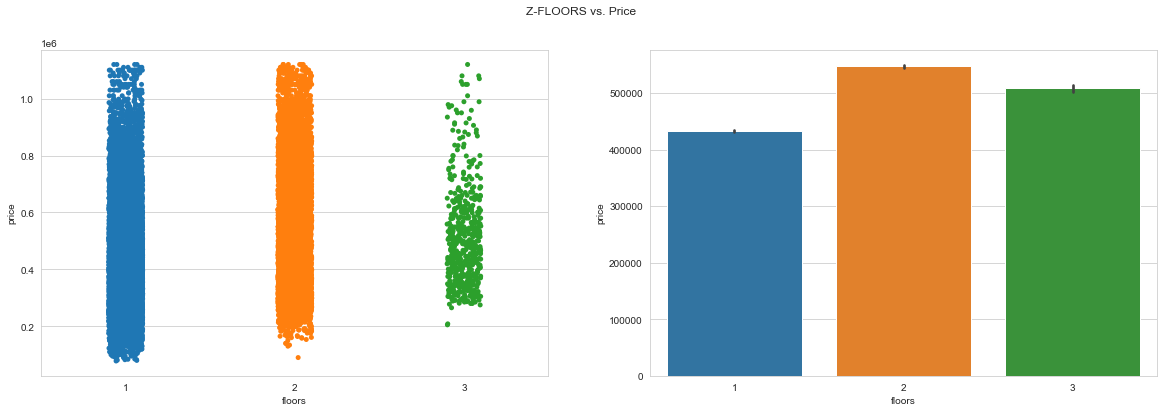

------------------------------------------------------------
1   0.59862
2   0.37312
3   0.02827
Name: floors, dtype: float64


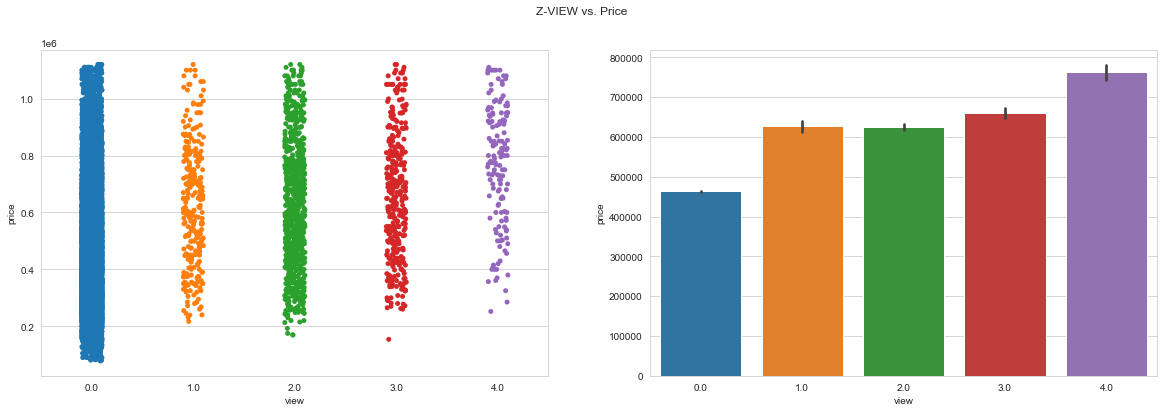

------------------------------------------------------------
0.00000   0.92300
2.00000   0.03954
3.00000   0.01710
1.00000   0.01339
4.00000   0.00697
Name: view, dtype: float64


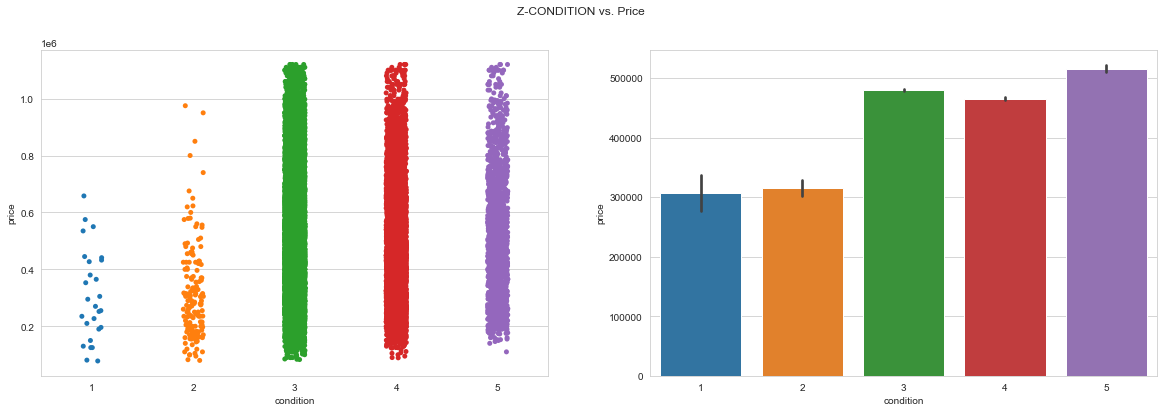

------------------------------------------------------------
3   0.64922
4   0.26548
5   0.07606
2   0.00791
1   0.00133
Name: condition, dtype: float64


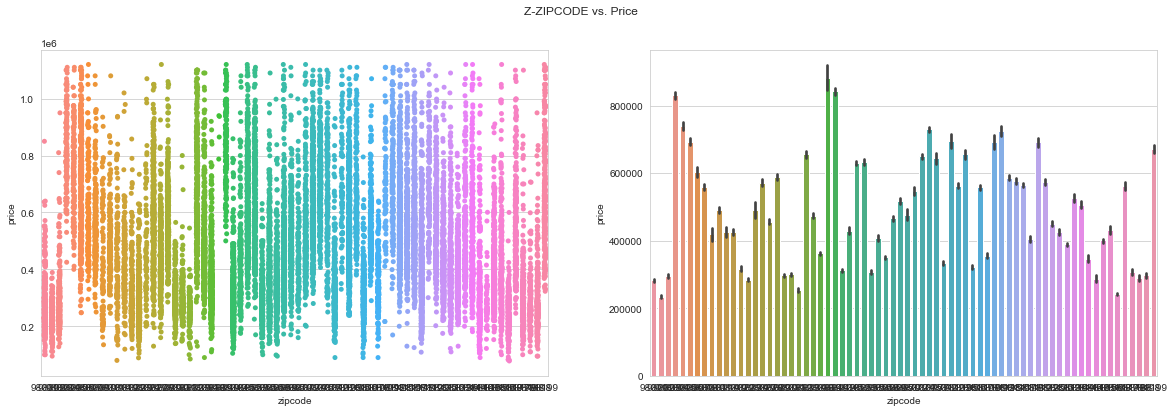

------------------------------------------------------------
98038   0.02881
98103   0.02866
98052   0.02763
98115   0.02718
98042   0.02698
          ...  
98102   0.00435
98109   0.00420
98024   0.00356
98148   0.00277
98039   0.00020
Name: zipcode, Length: 70, dtype: float64


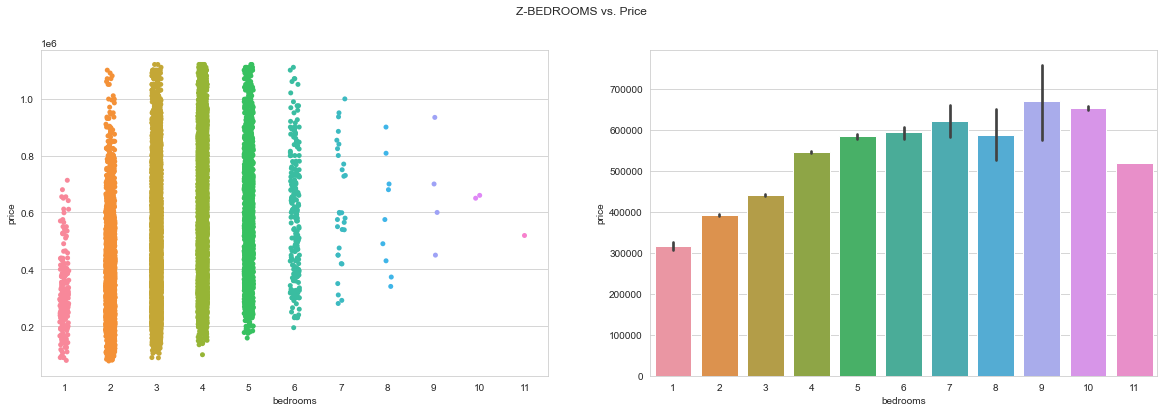

------------------------------------------------------------
3    0.46919
4    0.30946
2    0.13403
5    0.06494
6    0.01072
1    0.00939
7    0.00148
8    0.00044
9    0.00020
10   0.00010
11   0.00005
Name: bedrooms, dtype: float64


In [158]:
# Based on our findings in our linearity check we are going to inspect the following columns:
# Don't need to check binary variables because they are implicity code

cat_bars = ['floors', 'view', 'condition', 'zipcode', 'bedrooms']
for col in cat_bars:
    ordinal_check(df_iqrp, col)

Based on the results we are going to One Hot Encode the following variables: 
- Floors: Increases up to 2.5 and then decreases
- Zipcode: Completely random 
- Bedrooms: Increases up to 6 and then decreases
- Condition: Increases at 3 and then decreases at 4

This is because they do not appear ordinal. In other words, as the value of the independent variable increases, the price does not change at a constant rate. Check if they are statistically significant

## One Hot Encode Categorical Non-Ordinal Columns

In [107]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [108]:
# Seperate the columns we are going to OHE

cat_cols=['floors', 'zipcode', 'bedrooms', 'condition']


In [109]:
# Fit and transform categorical columns
# Turn matrix into DataFrame

encoder.fit(df_linco[cat_cols])

ohe_vars = encoder.transform(df_iqrp[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [110]:
# Confirm variables are OHE

cat_vars

,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.

In [111]:
# OLS Formula does not accept '.' so must replace these with '_'

name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

{'floors_1.5': 'floors_1_5',
 'floors_2.0': 'floors_2_0',
 'floors_2.5': 'floors_2_5',
 'floors_3.0': 'floors_3_0',
 'floors_3.5': 'floors_3_5',
 'zipcode_98002': 'zipcode_98002',
 'zipcode_98003': 'zipcode_98003',
 'zipcode_98004': 'zipcode_98004',
 'zipcode_98005': 'zipcode_98005',
 'zipcode_98006': 'zipcode_98006',
 'zipcode_98007': 'zipcode_98007',
 'zipcode_98008': 'zipcode_98008',
 'zipcode_98010': 'zipcode_98010',
 'zipcode_98011': 'zipcode_98011',
 'zipcode_98014': 'zipcode_98014',
 'zipcode_98019': 'zipcode_98019',
 'zipcode_98022': 'zipcode_98022',
 'zipcode_98023': 'zipcode_98023',
 'zipcode_98024': 'zipcode_98024',
 'zipcode_98027': 'zipcode_98027',
 'zipcode_98028': 'zipcode_98028',
 'zipcode_98029': 'zipcode_98029',
 'zipcode_98030': 'zipcode_98030',
 'zipcode_98031': 'zipcode_98031',
 'zipcode_98032': 'zipcode_98032',
 'zipcode_98033': 'zipcode_98033',
 'zipcode_98034': 'zipcode_98034',
 'zipcode_98038': 'zipcode_98038',
 'zipcode_98039': 'zipcode_98039',
 'zipcode_98040

In [112]:
# Rename cat_vars DF with new names so it can be processed by OLS formula

cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.

In [113]:
# Join OHE DataFrame back with original DateFrame
# Ensure each DataFrame has the same number of rows
# Begin by resetting index

df_iqrp=df_iqrp.reset_index()

In [114]:
# Check number of rows and ensure that it matches with the OHE DataFrame
# Should be 20235

df_iqrp

,index,id,date,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor
0,0,7129300520,2014-10-13,221900.00000,3,1180,1.00000,0.00000,0.00000,3,7,98178,47.51120,-122.25700,0,0,0.88060,1.00000
1,1,6414100192,2014-12-09,538000.00000,3,2570,2.00000,0.00000,0.00000,3,7,98125,47.72100,-122.31900,1,1,1.52071,0.94803
2,2,5631500400,2015-02-25,180000.00000,2,770,1.00000,0.00000,0.00000,3,6,98028,47.73790,-122.23300,0,0,0.28309,1.24039
3,3,2487200875,2014-12-09,604000.00000,4,1960,1.00000,0.00000,0.00000,5,7,98136,47.52080,-122.39300,1,0,1.44118,1.00000
4,4,1954400510,2015-02-18,510000.00000,3,1680,1.00000,0.00000,0.00000,3,8,98074,47.61680,-122.04500,0,0,0.93333,1.07690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230,21453,1245002281,2014-05-12,1050000.00000,4,3280,2.00000,0.00000,0.00000,3,10,98033,47.68550,-122.20100,1,0,1.36667,1.31721
20231,21461,7010700308,2014-11-12,1010000.00000,4,3610,2.00000,0.00000,0.00000,3,9,98199,47.65800,-122.39600,1,0,1.82323,1.00000
20232,21532,8835770330,2014-08-19,1060000.00000,2,2370,2.00000,0.00000,0.00000,3,11,98045,47.45430,-121.77800,0,0,0.61399,1.21942
20233,21577,8672200110,2015-03-17,1090000.00000,5,4170,2.00000,0.00000,2.00000,3,10,98056,47.53540,-122.18100,0,0,1.37624,1.02030


In [115]:
# Check to ensure that concat was done on the proper axis

df_ohe = pd.concat([df_iqrp, cat_vars], axis=1, ignore_index=False)

In [116]:
# Ensure we do not have any missing values

df_ohe.isna().sum()

index          0
id             0
date           0
price          0
bedrooms       0
              ..
bedrooms_11    0
condition_2    0
condition_3    0
condition_4    0
condition_5    0
Length: 106, dtype: int64

We now have a new DataFrame called df_ohe that includes non-linear categorical variable as one hot encoded variables. This way, our model will be better meet assumptions of no multicollinearity, and all independent variables having a linear relationship with price. Important to drop original non OHE variables from DataFrame so they are not double counted

OHE variables are interpreted as such: With respect to the intercept, for this specific category, the target would variable would altered by the value of the coefficient. For example, if floors_1_5 had a coefficient of 15, the price would move up by $15. 

In [117]:
# Drop non-OHE variables so they are not double counted

cols_to_drop = ['floors', 'zipcode', 'bedrooms', 'condition']
df_ohe.drop(cols_to_drop, axis=1, inplace=True)

In [118]:
# Ensure we do not have extra columns

df_ohe.describe()

,index,id,price,sqft_living,waterfront,view,grade,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
count,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000
mean,10778.21596,4605299135.81389,477281.03736,1976.69795,0.00247,0.17163,7.53373,47.55684,-122.21303,0.37163,0.03059,1.03840,1.12529,0.08891,0.36768,0.00544,0.02797,0.00030,0.00974,0.01364,0.00736,0.00741,0.01962,0.00667,0.01315,0.00489,0.00959,0.00593,0.00939,0.01151,0.02422,0.00356,0.01942,0.01384,0.01542,0.01250,0.01339,0.00608,0.01804,0.02590,0.02881,0.00020,0.00810,0.02698,0.01067,0.02763,0.01863,0.01285,0.01982,0.02219,0.02219,0.01483,0.00563,0.01300,0.02056,0.01621,0.00919,0.01735,0.00435,0.02866,0.00875,0.01631,0.01285,0.00914,0.00420,0.00810,0.02718,0.01537,0.02659,0.02431,0.00751,0.01329,0.01942,0.01740,0.02392,0.01270,0.01557,0.01364,0.00277,0.02155,0.01201,0.01305,0.01127,0.01270,0.00667,0.01349,0.01344,0.13403,0.46919,0.30946,0.06494,0.01072,0.00148,0.00044,0.00020,0.00010,0.00005,0.00791,0.64922,0.26548,0.07606
std,6231.88071,2877559932.98793,206564.79018,773.94673,0.04965,0.63834,1.03396,0.14115,0.14244,0.48325,0.17221,0.30278,1.24407,0.28461,0.48219,0.07353,0.16489,0.01722,0.09819,0.11599,0.08550,0.08578,0.13869,0.08141,0.11390,0.06978,0.09745,0.07678,0.09645,0.10669,0.15372,0.05955,0.13801,0.11682,0.12321,0.11112,0.11495,0.07773,0.13309,0.15883,0.16728,0.01406,0.08966,0.16204,0.10277,0.16390,0.13522,0.11263,0.13937,0.14730,0.14730,0.12086,0.07485,0.11327,0.14190,0.12628,0.09544,0.13056,0.06580,0.16686,0.09312,0.12666,0.11263,0.09518,0.06468,0.08966,0.16261,0.12302,0.16088,0.15403,0.08635,0.11453,0.13801,0.13074,0.15280,0.11198,0.12380,0.11

In [119]:
# Confirm non-OHE variables have been dropped

df_ohe.head()

,index,id,date,price,sqft_living,waterfront,view,grade,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,0,7129300520,2014-10-13,221900.00000,1180,0.00000,0.00000,7,47.51120,-122.25700,0,0,0.88060,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,1,6414100192,2014-12-09,538000.00000,2570,0.00000,0.00000,7,47.72100,-122.31900,1,1,1.52071,0.94803,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,2,5631500400,2015-02-25,180000.00000,770,0.00000,0.00000,6,47.73790,-122.23300,0,0,0.28309,1.24039,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,3,2487200875,2014-12-09,604000.00000,1960,0.00000,0.00000,7,47.52080,-122.39300,1,0,1.44118,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000

In [120]:
# Create list of columns excluding id, date, and price because that is our target

x_targs = df_ohe.columns
x_targs = list(x_targs)
x_targs = [x for x in x_targs if x not in ('id', 'date', 'price', 'index')]
x_targs

['sqft_living',
 'waterfront',
 'view',
 'grade',
 'lat',
 'long',
 'basementyes',
 'renovated_yes',
 'living_vs_neighbor',
 'lot_vs_neighbor',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipco

### Model 5: OHE Iteration 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     989.3
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:55   Log-Likelihood:            -2.5854e+05
No. Observations:               20235   AIC:                         5.173e+05
Df Residuals:                   20136   BIC:                         5.181e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.37e+07   3.36e+06     -4.078      0.000   -2.03e+07   -7.12e+06
sqft_living          135.6679      1.717     79.017      0.000     132.303     139.033
waterfront          1.644e+05   1.31e+04     12.581      0.000    1.39e+05     1.9e+05
view                3.255e+04   1057.566     30.775      0.000    3.05e+04    3.46e+04
grade               4.433e+04    987.127     44.906      0.000    4.24e+04    4.63e+04
lat                 1.483e+05   3.49e+04      4.246      0.000    7.98e+04    2.17e+05
long               -5.204e+04   2.48e+04     -2.096      0.036   -1.01e+05   -3369.335
basementyes        -2.049e+04   1541.175    -13.296      0.000   -2.35e+04   -1.75e+04
renovated_yes       4.836e+04   3577.607     13.516      0.000    4.13e+04    5.54e+04
living_vs_neighbor -4.941e+04   2794.428    -17.681      0.000   -5.49e+04   -4.39e+04
lot_vs_neighbor     5681.0665    492.684     11.531      0.000    4715.365    6646.768
floors_1_5          1.535e+04   2386.316      6.431      0.000    1.07e+04       2e+04
floors_2_0         -7407.2962   1778.178     -4.166      0.000   -1.09e+04   -3921.922
floors_2_5         -7077.1193   8407.212     -0.842      0.400   -2.36e+04    9401.705
floors_3_0         -5.971e+04   4201.454    -14.211      0.000   -6.79e+04   -5.15e+04
floors_3_5         -6.887e+04   3.52e+04     -1.957      0.050   -1.38e+05     115.089
zipcode_98002       1.423e+04   7779.435      1.830      0.067   -1014.849    2.95e+04
zipcode_98003      -7136.8173   6960.317     -1.025      0.305   -2.08e+04    6505.973
zipcode_98004        4.76e+05   1.37e+04     34.742      0.000    4.49e+05    5.03e+05
zipcode_98005       2.923e+05   1.38e+04     21.178      0.000    2.65e+05    3.19e+05
zipcode_98006       2.412e+05   1.14e+04     21.234      0.000    2.19e+05    2.63e+05
zipcode_98007        2.25e+05   1.42e+04     15.852      0.000    1.97e+05    2.53e+05
zipcode_98008       2.077e+05   1.35e+04     15.374      0.000    1.81e+05    2.34e+05
zipcode_98010       1.041e+05   1.19e+04      8.737      0.000    8.07e+04    1.27e+05
zipcode_98011       8.453e+04   1.75e+04      4.819      0.000    5.02e+04    1.19e+05
zipcode_98014       9.138e+04   1.93e+04      4.738      0.000    5.36e+04    1.29e+05
zipcode_98019       5.811e+04    1.9e+04      3.062      0.002    2.09e+04    9.53e+04
zipcode_98022       4.104e+04   1.04e+04      3.950      0.000    2.07e+04    6.14e+04
zipcode_98023      -2.597e+04   6420.817     -4.045      0.000   -3.86e+04   -1.34e+04
zipcode_98024       1.553e+05   1.71e+04      9.093      0.000    1.22e+05    1.89e+05
zipcode_98027       1.762e+05   1.15e+04     15.335      0.000    1.54e+05    1.99e+05
zipcode_98028       6.979e+04   1.71e+04      4.091      0.000    3.63e+04    1.03e+05
zipcode_98029       2.029e+05   1.31e+

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

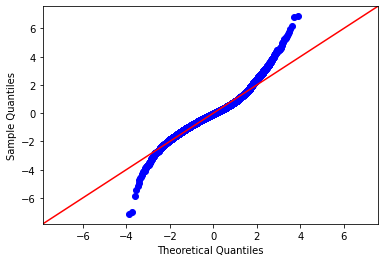

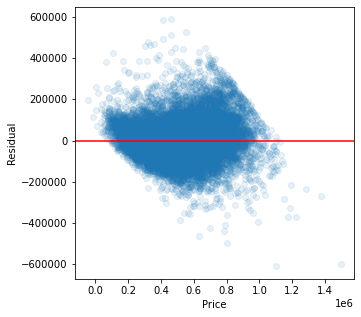

In [121]:
model_ohe = model_summary(df_ohe, x_targs, 'price')
sked_show(df_ohe, x_targs, model_ohe)

**Conclusions**
- R^2: 0.828
- Adjusted R^2: 0.827
- QQ Plot: Does a good job of meeting assumption but residuals begin to slgihtly trail off at 2nd quantile
- Homoskedacicity: Meets assumptions
- Non-Statistically Significant Preditors: 
    - Maintaining bedroom because a majority of values are statistically significant
    - Floors are majority statistically significant. Will alter half floors into full floors
    - Majority of zipcodes are statistically significant

Next step will be to turn floors into integer values

### Model 5: Iteration 2 - Handling Floor Values

- In this iteration we are going to turn half floors into their integer form (ie 1.5 becomes 1). Typically, the 0.5 will signify a loft or singular room which some may not classify as an additional floor. 

In [122]:
df_iqrp['floors'].value_counts(1)

1.00000   0.50971
2.00000   0.36768
1.50000   0.08891
3.00000   0.02797
2.50000   0.00544
3.50000   0.00030
Name: floors, dtype: float64

- ~51% of homes are 1 story 
- ~37% are 2 stories
- ~3% are 3 stories

Going to add the half story to their respective integer value (1.5 will become 1, etc...)

In [123]:
# Function to adjust floors to their nearest ingeger value

df_iqrp['floors'] = df_iqrp['floors'].map(lambda x: int(x))    

In [124]:
# Ensure transformation worked

df_iqrp['floors'].value_counts(1)

1   0.59862
2   0.37312
3   0.02827
Name: floors, dtype: float64

As we can see, the 0.5 values were added to the respective integer floors.

Now, we can try OHE with floors and the number of categories will be cut down to 2 (floors_2 and floors_3)

In [125]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

# Seperate the columns we are going to OHE

cat_cols=[]

# Fit and transform categorical columns
# Turn matrix into DataFrame

def onehotencoder(df, cat_cols):
    encoder.fit(df[cat_cols])

    ohe_vars = encoder.transform(df[cat_cols])
    encoder.get_feature_names(cat_cols)
    cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

    # OLS Formula does not accept '.' so must replace these with '_'

    name_dict = {}
    for col in cat_vars.columns:
        name_dict[col]=col.replace('.','_')

    # Rename cat_vars DF with new names so it can be processed by OLS formula

    cat_vars.rename(columns=name_dict, inplace=True)

    # Join OHE DataFrame back with original DateFrame
    # Ensure each DataFrame has the same number of rows
    # Begin by resetting index

    df=df.reset_index()

    df_ohe = pd.concat([df, cat_vars], axis=1, ignore_index=False)

    # Drop original column names
    cols_to_drop = cat_cols
    df_ohe.drop(cols_to_drop, axis=1, inplace=True)
    return df_ohe

In [126]:
# Use function to re-OHE with new floors values


cat_cols = ['floors', 'zipcode', 'bedrooms', 'condition']
df_ohefloors = onehotencoder(df_iqrp, cat_cols)

In [127]:
# Should see floors_2 and floors_3

df_ohefloors.head()

,level_0,index,id,date,price,sqft_living,waterfront,view,grade,lat,long,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor,floors_2,floors_3,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
0,0,0,7129300520,2014-10-13,221900.00000,1180,0.00000,0.00000,7,47.51120,-122.25700,0,0,0.88060,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,1,1,6414100192,2014-12-09,538000.00000,2570,0.00000,0.00000,7,47.72100,-122.31900,1,1,1.52071,0.94803,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,2,2,5631500400,2015-02-25,180000.00000,770,0.00000,0.00000,6,47.73790,-122.23300,0,0,0.28309,1.24039,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,3,3,2487200875,2014-12-09,604000.00000,1960,0.00000,0.00000,7,47.52080,-122.39300,1,0,1.44118,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00

In [128]:
# Confirm that we do not have any null values in our DataFrame

df_ohefloors.isna().sum().any()

False

In [129]:
# Create list of columns excluding id, date, and price because that is our target
# Remove additional indices created by resetting the index
# Removing lat and long because zipcode acts as the proxy for location

x_targs = df_ohefloors.columns
x_targs = list(x_targs)
x_targs = [x for x in x_targs if x not in ('id', 'date', 'price', 'index', 'level_0', 'lat', 'long')]
x_targs

['sqft_living',
 'waterfront',
 'view',
 'grade',
 'basementyes',
 'renovated_yes',
 'living_vs_neighbor',
 'lot_vs_neighbor',
 'floors_2',
 'floors_3',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 

Targets look correct with new OHE variables and no excess indices. 

Next step is to run Model 5 Iteration 2 and check if floors have a significant p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1039.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:55   Log-Likelihood:            -2.5858e+05
No. Observations:               20235   AIC:                         5.173e+05
Df Residuals:                   20141   BIC:                         5.181e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.208e+05   1.87e+04    -17.176      0.000   -3.57e+05   -2.84e+05
sqft_living          136.4005      1.715     79.541      0.000     133.039     139.762
waterfront          1.646e+05   1.31e+04     12.581      0.000    1.39e+05     1.9e+05
view                3.249e+04   1058.885     30.679      0.000    3.04e+04    3.46e+04
grade                4.42e+04    987.517     44.763      0.000    4.23e+04    4.61e+04
basementyes        -2.246e+04   1507.094    -14.906      0.000   -2.54e+04   -1.95e+04
renovated_yes       4.879e+04   3581.194     13.625      0.000    4.18e+04    5.58e+04
living_vs_neighbor -4.897e+04   2794.994    -17.520      0.000   -5.44e+04   -4.35e+04
lot_vs_neighbor     5730.2561    493.314     11.616      0.000    4763.319    6697.193
floors_2           -1.071e+04   1707.728     -6.269      0.000   -1.41e+04   -7359.128
floors_3           -6.452e+04   4129.581    -15.623      0.000   -7.26e+04   -5.64e+04
zipcode_98002       1.167e+04   7660.497      1.523      0.128   -3346.308    2.67e+04
zipcode_98003      -4413.3594   6900.304     -0.640      0.522   -1.79e+04    9111.800
zipcode_98004       5.169e+05   8431.130     61.312      0.000       5e+05    5.33e+05
zipcode_98005       3.309e+05   8446.732     39.169      0.000    3.14e+05    3.47e+05
zipcode_98006       2.714e+05   6362.838     42.655      0.000    2.59e+05    2.84e+05
zipcode_98007       2.625e+05   8732.050     30.061      0.000    2.45e+05     2.8e+05
zipcode_98008        2.44e+05   6999.033     34.861      0.000     2.3e+05    2.58e+05
zipcode_98010       9.473e+04   9781.390      9.685      0.000    7.56e+04    1.14e+05
zipcode_98011       1.474e+05   7690.627     19.160      0.000    1.32e+05    1.62e+05
zipcode_98014       1.249e+05   9099.142     13.730      0.000    1.07e+05    1.43e+05
zipcode_98019        1.06e+05   7742.104     13.693      0.000    9.08e+04    1.21e+05
zipcode_98022       1.313e+04   7281.503      1.803      0.071   -1142.534    2.74e+04
zipcode_98023      -2.139e+04   5995.233     -3.568      0.000   -3.31e+04   -9637.737
zipcode_98024        1.74e+05   1.11e+04     15.646      0.000    1.52e+05    1.96e+05
zipcode_98027       1.967e+05   6334.649     31.056      0.000    1.84e+05    2.09e+05
zipcode_98028       1.345e+05   6871.210     19.568      0.000    1.21e+05    1.48e+05
zipcode_98029       2.271e+05   6723.788     33.771      0.000    2.14e+05     2.4e+05
zipcode_98030       5004.5965   7066.591      0.708      0.479   -8846.499    1.89e+04
zipcode_98031       9977.2305   6932.001      1.439      0.150   -3610.059    2.36e+04
zipcode_98032      -4750.3462   9003.475     -0.528      0.598   -2.24e+04    1.29e+04
zipcode_98033       3.231e+05   6416.927     50.350      0.000    3.11e+05    3.36e+05
zipcode_98034       1.878e+05   5909.2

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

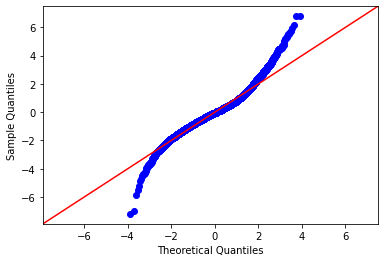

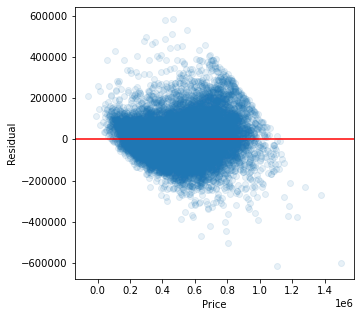

In [130]:
model_ohefloors = model_summary(df_ohefloors, x_targs, 'price')
sked_show(df_ohefloors, x_targs, model_ohefloors)

As we can see, floors are statistically significant now. Floors_2 and Floors_3 are both statstically significant with price

**Conclusions**
- R^2: 0.827
- Adjusted R^2: 0.827
- QQ Plot: Does a good job of meeting assumption but residuals begin to slightly trail off at 2nd quantile
- Homoskedacicity: Meets assumptions
- Non-Statistically Significant Preditors: 
    - Maintaining bedroom because a majority of values are statistically significant
    - Majority of zipcodes are statistically significant

- **Model 5 Iteration 2 will act as our final model**
    - It does not have any statistically insignificant predictor values except for a handful of zipcodes which are OHE variables
    - R^2 of 0.83 which means that the predictor variables explain ~83% of the variation in the target variable
    - Meets all assumptions:
        - Homoskedacicity
        - Predictor variables have a linear relationship with the target variable
        - No multicollinearity between predictor variables

# Intepretation
- Share what the results of our multiple linear regression model mean for our stakeholders
- Support these points with visualizations from the dataset

## Standardize data for intepretation

For our data to be on the same unit, we must use a Standard Scaler so we can interpret coefficients on the same magnitude and unit. Important to note that **standardizing** data will change the range and distribution of the data. Given that variables will be on the same scale, can compare a unit 1 increase evenly across predictors

In [131]:
df_zf = df_ohefloors.copy()

In [132]:
# Predictor values, need to evaluate which are appropriate to scale with the Z-Score
# standard scaler

x_scale = df_zf.columns
x_scale

Index(['level_0', 'index', 'id', 'date', 'price', 'sqft_living', 'waterfront',
       'view', 'grade', 'lat', 'long', 'basementyes', 'renovated_yes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'floors_2', 'floors_3',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zip

We don't scale our target variable (price) for interpretation because then conclusions will
changes in prices based on comparisons of standard deviation

In [133]:
# Not going to scale OHE variables because they are already implicity scaled (0,1)
# Not going to scale binary variables because they are already implicity scaled (0,1)

x_scale = [x for x in x_targs if x in ('sqft_living', 'view', 'grade', 'living_vs_neighbor',
                                       'lot_vs_neighbor')]

In [134]:
x_scale

['sqft_living', 'view', 'grade', 'living_vs_neighbor', 'lot_vs_neighbor']

We are ready to scale all of our numeric data

In [135]:
df_zf=df_zf.drop(['level_0', 'index', 'date', 'lat', 'long'], axis=1)

Dropping lat, and long because they are difficult to interpret for our purposes and we have zipcode to act as a proxy for location

In [136]:
# Fit and transform original values into scaled values

df_zf[x_scale] = scaler.fit_transform(df_zf[x_scale])
df_zf.describe()

,id,price,sqft_living,waterfront,view,grade,basementyes,renovated_yes,living_vs_neighbor,lot_vs_neighbor,floors_2,floors_3,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,condition_2,condition_3,condition_4,condition_5
count,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000,20235.00000
mean,4605299135.81389,477281.03736,0.00000,0.00247,-0.00000,-0.00000,0.37163,0.03059,-0.00000,0.00000,0.37312,0.02827,0.00974,0.01364,0.00736,0.00741,0.01962,0.00667,0.01315,0.00489,0.00959,0.00593,0.00939,0.01151,0.02422,0.00356,0.01942,0.01384,0.01542,0.01250,0.01339,0.00608,0.01804,0.02590,0.02881,0.00020,0.00810,0.02698,0.01067,0.02763,0.01863,0.01285,0.01982,0.02219,0.02219,0.01483,0.00563,0.01300,0.02056,0.01621,0.00919,0.01735,0.00435,0.02866,0.00875,0.01631,0.01285,0.00914,0.00420,0.00810,0.02718,0.01537,0.02659,0.02431,0.00751,0.01329,0.01942,0.01740,0.02392,0.01270,0.01557,0.01364,0.00277,0.02155,0.01201,0.01305,0.01127,0.01270,0.00667,0.01349,0.01344,0.13403,0.46919,0.30946,0.06494,0.01072,0.00148,0.00044,0.00020,0.00010,0.00005,0.00791,0.64922,0.26548,0.07606
std,2877559932.98793,206564.79018,1.00002,0.04965,1.00002,1.00002,0.48325,0.17221,1.00002,1.00002,0.48364,0.16574,0.09819,0.11599,0.08550,0.08578,0.13869,0.08141,0.11390,0.06978,0.09745,0.07678,0.09645,0.10669,0.15372,0.05955,0.13801,0.11682,0.12321,0.11112,0.11495,0.07773,0.13309,0.15883,0.16728,0.01406,0.08966,0.16204,0.10277,0.16390,0.13522,0.11263,0.13937,0.14730,0.14730,0.12086,0.07485,0.11327,0.14190,0.12628,0.09544,0.13056,0.06580,0.16686,0.09312,0.12666,0.11263,0.09518,0.06468,0.08966,0.16261,0.12302,0.16088,0.15403,0.08635,0.11453,0.13801,0.13074,0.15280,0.11198,0.12380,0.11599,0.05254,0.14520,0.10893,0.11348,0.10555,0.11198,0.08141,0.11537,0.11516,0.34069,0.49906,0.46228,0.24642,0.10300,0.03848,0.02109,0.01406,0.00994,0.00703,0.08857,0.47723,0.44160,0.26509
min,1000102.00000,78000.00000,-2.07603,0.0000

As we can observe, the column that we have used the standard scaler to fit and transform now have a mean of 0 and a standard deviation of 1. They have been converted into Z-scores which allows us to compare predictors against price and not have to consider the impact of magnitude and units. For example, a 1 bedroom increase and a 1 sqft_living increase now represent equal changes to the existing home

## View which predictors make the most significant impact on home price

- When evaluating coefficients, we are looking at two things:
    1. As we increase this predictor variable, does it make a positive or negative impact on price (+/-)
    2. How large is the coefficient. As we increase the predictor variable by a single unit, how much does that impact price. In the case of Z-scores, a 1 unit increase means a 1 standard deviation increase. For binary variables, it means either this feature is present or it is not
    3. Coefficient values are interpreted as 'with respect for the intercept (baseline)'

In [137]:
x_targs

['sqft_living',
 'waterfront',
 'view',
 'grade',
 'basementyes',
 'renovated_yes',
 'living_vs_neighbor',
 'lot_vs_neighbor',
 'floors_2',
 'floors_3',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1039.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        12:35:56   Log-Likelihood:            -2.5858e+05
No. Observations:               20235   AIC:                         5.173e+05
Df Residuals:                   20141   BIC:                         5.181e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.431e+05   1.82e+04     13.339      0.000    2.07e+05    2.79e+05
sqft_living         1.056e+05   1327.172     79.541      0.000    1.03e+05    1.08e+05
waterfront          1.646e+05   1.31e+04     12.581      0.000    1.39e+05     1.9e+05
view                2.074e+04    675.913     30.679      0.000    1.94e+04    2.21e+04
grade                4.57e+04   1021.031     44.763      0.000    4.37e+04    4.77e+04
basementyes        -2.246e+04   1507.094    -14.906      0.000   -2.54e+04   -1.95e+04
renovated_yes       4.879e+04   3581.194     13.625      0.000    4.18e+04    5.58e+04
living_vs_neighbor -1.483e+04    846.256    -17.520      0.000   -1.65e+04   -1.32e+04
lot_vs_neighbor     7128.6452    613.701     11.616      0.000    5925.741    8331.549
floors_2           -1.071e+04   1707.728     -6.269      0.000   -1.41e+04   -7359.128
floors_3           -6.452e+04   4129.581    -15.623      0.000   -7.26e+04   -5.64e+04
zipcode_98002       1.167e+04   7660.497      1.523      0.128   -3346.308    2.67e+04
zipcode_98003      -4413.3594   6900.304     -0.640      0.522   -1.79e+04    9111.800
zipcode_98004       5.169e+05   8431.130     61.312      0.000       5e+05    5.33e+05
zipcode_98005       3.309e+05   8446.732     39.169      0.000    3.14e+05    3.47e+05
zipcode_98006       2.714e+05   6362.838     42.655      0.000    2.59e+05    2.84e+05
zipcode_98007       2.625e+05   8732.050     30.061      0.000    2.45e+05     2.8e+05
zipcode_98008        2.44e+05   6999.033     34.861      0.000     2.3e+05    2.58e+05
zipcode_98010       9.473e+04   9781.390      9.685      0.000    7.56e+04    1.14e+05
zipcode_98011       1.474e+05   7690.627     19.160      0.000    1.32e+05    1.62e+05
zipcode_98014       1.249e+05   9099.142     13.730      0.000    1.07e+05    1.43e+05
zipcode_98019        1.06e+05   7742.104     13.693      0.000    9.08e+04    1.21e+05
zipcode_98022       1.313e+04   7281.503      1.803      0.071   -1142.534    2.74e+04
zipcode_98023      -2.139e+04   5995.233     -3.568      0.000   -3.31e+04   -9637.737
zipcode_98024        1.74e+05   1.11e+04     15.646      0.000    1.52e+05    1.96e+05
zipcode_98027       1.967e+05   6334.649     31.056      0.000    1.84e+05    2.09e+05
zipcode_98028       1.345e+05   6871.210     19.568      0.000    1.21e+05    1.48e+05
zipcode_98029       2.271e+05   6723.788     33.771      0.000    2.14e+05     2.4e+05
zipcode_98030       5004.5965   7066.591      0.708      0.479   -8846.499    1.89e+04
zipcode_98031       9977.2305   6932.001      1.439      0.150   -3610.059    2.36e+04
zipcode_98032      -4750.3462   9003.475     -0.528      0.598   -2.24e+04    1.29e+04
zipcode_98033       3.231e+05   6416.927     50.350      0.000    3.11e+05    3.36e+05
zipcode_98034       1.878e+05   5909.2

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

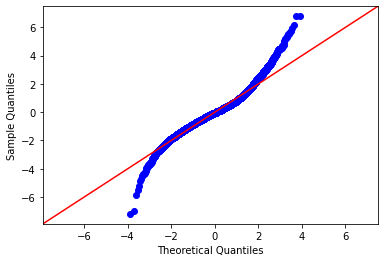

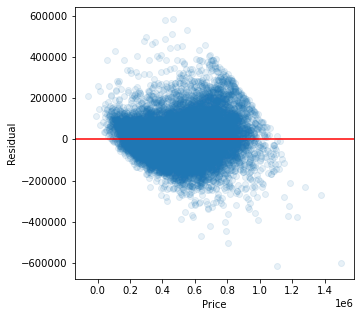

In [138]:
# Run model to get parameter (coefficient) values from statsmodels

model_final = model_summary(df_zf, x_targs, 'price')
sked_show(df_zf, x_targs, model_final)

Confirmed that assumptions and values look the same

Scaling data does not make a difference

In [139]:
# Use statsmodels .params to extract coefficient values into a DataFrame
# Include coefficient and absolute coefficient for analysis and visualizations

df_coeff=pd.DataFrame({'coeff': model_final.params, 'abs_coeff': abs(model_final.params)})

In [140]:
df_coeff

,coeff,abs_coeff
Intercept,243052.98038,243052.98038
sqft_living,105564.12643,105564.12643
waterfront,164587.53385,164587.53385
view,20736.15964,20736.15964
grade,45704.32075,45704.32075
...,...,...
bedrooms_11,11786.85452,11786.85452
condition_2,48276.34358,48276.34358
condition_3,66106.77111,66106.77111
condition_4,87080.87703,87080.87703


<AxesSubplot:>

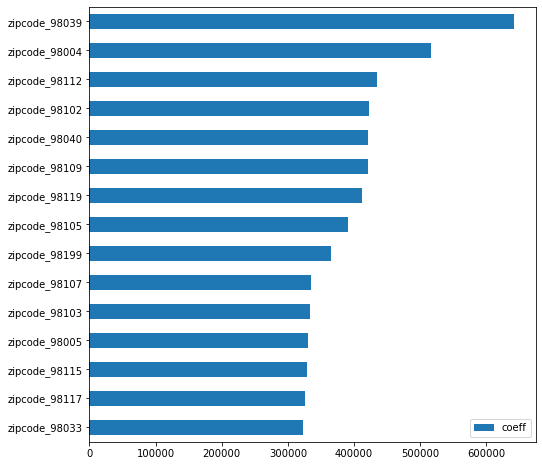

In [141]:
# Create horizontal bar plot to view the 15 most impactful predictor variables on price, from an
# absolute perspective

df_coeff.drop('Intercept', axis=0).sort_values(by='abs_coeff').tail(15).plot(kind='barh', y='coeff', figsize=(8,8))

As we can see, the 15 most impactful predictor variables are all zipcodes. With respect to the intercept, some of the zipcodes can explain ~$600,000 in price. 

98039, 98004, and 98112 are the top 3 most expensive zip codes. These zips may be closest to downtown Seattle. Check that later

Almost all zipcodes are statistically significant as we can see they have a major impact on price

### Digging Deepr Into Zip codes
- Evaluating how the top zipcodes compare to the average zip code in Kings County

In [142]:
# Gather data on the top 10 zipcodes in Kings County

top_10_zips = df_iqrp.groupby('zipcode')['price'].median().sort_values(ascending=False).nlargest(10).reset_index()
top_10_zips

,zipcode,price
0,98039,901250.00000
1,98040,850000.00000
2,98004,825000.00000
3,98005,740000.00000
4,98075,725393.00000
5,98112,714250.00000
6,98109,700000.00000
7,98006,691100.00000
8,98119,667500.00000
9,98102,667475.00000


Using median in the groupby statement to handle outlier values. The dataset does not contain predicted outliers but still useful to use median to reduce 'noise'

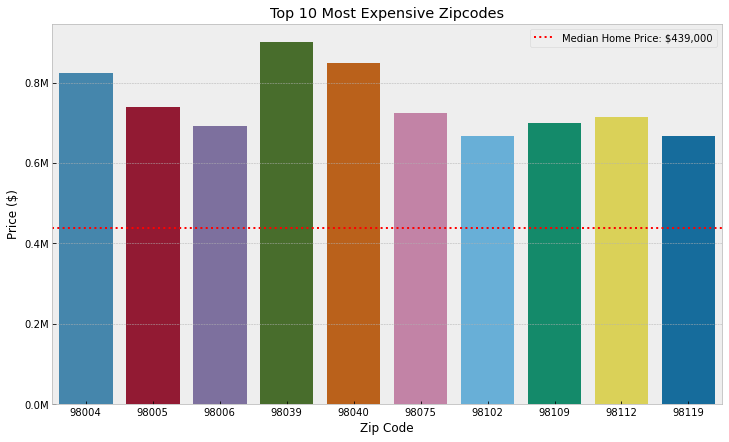

In [143]:
# Comparing top 10 zip codes by median to Kings Country overall median price home

# Function to display values in millions
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Kings County median home price
median = int(df_iqrp['price'].median())

# Construct visualization
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(data=top_10_zips, x='zipcode', y='price',ax=ax)
    ax.set_xlabel('Zip Code')
    ax.set_ylabel('Price ($)')
    ax.set_title('Top 10 Most Expensive Zipcodes')
    ax.axhline(median, color='r', ls=':', label=f'Median Home Price: ${median:,}')
    ax.legend()

    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)

The median home price in King County is \\$439,000. The top 10 most expensive zipcodes exceed that value by a minimum of ~\\$250,000 up to ~ $450,000. The most expensive zip codes tend to be situated around urban Seattle. 

## Evaluating the predictors not based on location

- Evaluate how the predictor values outside of zip code impact home price

In [144]:
# Create list of features excluding zip codes

indices = df_coeff.index
non_zips = []
for ind in indices:
    if ind.startswith('zip'):
        pass 
    else:
        non_zips.append(ind)

In [145]:
# These are the predictors that are not zip codes

non_zips

['Intercept',
 'sqft_living',
 'waterfront',
 'view',
 'grade',
 'basementyes',
 'renovated_yes',
 'living_vs_neighbor',
 'lot_vs_neighbor',
 'floors_2',
 'floors_3',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5']

In [146]:
# Select the non-zip rows

df_coeff2 = df_coeff.loc[non_zips]

In [147]:
# Remove intercept because it is not a coefficient value

df_coeff2.drop('Intercept', axis=0, inplace=True)

In [148]:
# Reset index so that we can sort by index for the seaborn plot

df_coeff2=df_coeff2.reset_index()

In [149]:
# Sort in descending order so the visualization will be easier to conceptualize

df_coeff2=df_coeff2.sort_values(by='abs_coeff', ascending=False)

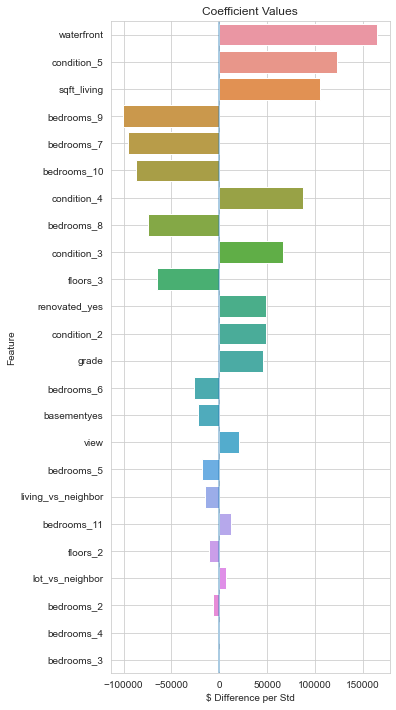

In [150]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(5,12))


sns.barplot(data=df_coeff2, y='index', x='coeff', orient='h')
ax.set_title('Coefficient Values')
ax.set_xlabel('$ Difference per Std')
ax.set_ylabel('Feature')


ax.axvline(0, alpha=0.5)
ax.grid(True)

Based on the graph above, waterfront (binary variable) is the most important indicator of price. If a home has a waterfront view, it is estimated to cost ~\\$150,000 more. Next comes condition, all condition coefficients have positive values. The greater the condition, the greater the estimated home value will be. Condition represents the overall state of the house. In my estimation, for a home to have a high condition value, it must be constructed with quality materials, have structural integrity, be generally well kept, and look visually appealing from the outside. Next is square foot living, the larger the home, the higher the price. A 1 Standard Deviation increase in sqft_living results in a \\$100,000 price increase. This means that that compared to the mean, the home that is 1 standard deviation above the mean sqft_living will cost $100,000 more. 

Bedrooms 9,7, and 10 all have negative impacts on price. As we observed earlier, bedrooms did not have a linear relationship with price which is why we needed to OHE them. 

All floors with respect to 1 floor have a negative relationship with price. This means that if you add a second or third floor your home price will be lower

Grade has a positive impact on price, which is how the King City council determines the quality of the home. Measures if a home needs maintance or is in good condition.

Homes with basements have a lower price on average than those that do not.

View has a positive relationship with price. 

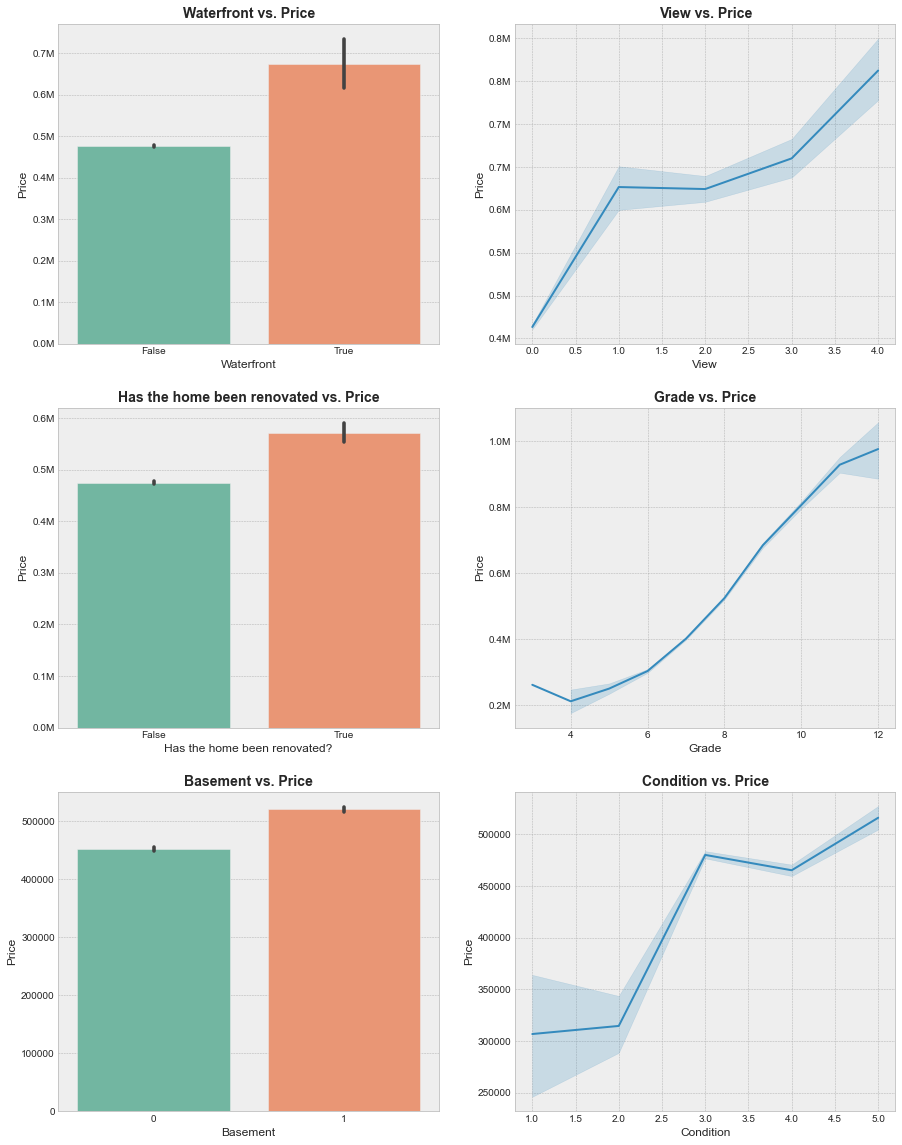

In [151]:
with plt.style.context('bmh'):

    fig, axs=plt.subplots(nrows=3, ncols=2, figsize=(15,20))

    sns.barplot(data=df_ohefloors, x='waterfront', y='price', ax=axs[0,0], palette="Set2")
    sns.lineplot(data=df_ohefloors, x='view', y='price', ax=axs[0,1])
    sns.barplot(data=df_ohefloors, x='renovated_yes', y='price', ax=axs[1,0], palette="Set2")
    sns.lineplot(data=df_ohefloors, x='grade', y='price',ax=axs[1,1], palette="Set2")
    sns.barplot(data=df_ohefloors, x='basementyes', y='price',ax=axs[2,0], palette="Set2")
    sns.lineplot(data=df_iqrp, x='condition', y='price',ax=axs[2,1], palette="Set2")
    
    
    tf_labs = ['False', 'True']
    
    axs[0,0].set_title('Waterfront vs. Price', fontsize=14, fontweight='bold')
    axs[0,0].set_xlabel('Waterfront')
    axs[0,0].set_ylabel('Price')
    axs[0,0].set_xticklabels(tf_labs)
    
    axs[0,1].set_title('View vs. Price',fontsize=14, fontweight='bold')
    axs[0,1].set_xlabel('View')
    axs[0,1].set_ylabel('Price')
    
    axs[1,0].set_title('Has the home been renovated vs. Price', fontsize=14, fontweight='bold')
    axs[1,0].set_xlabel('Has the home been renovated?')
    axs[1,0].set_ylabel('Price')
    axs[1,0].set_xticklabels(tf_labs)
    
    axs[1,1].set_title('Grade vs. Price', fontsize=14, fontweight='bold')
    axs[1,1].set_xlabel('Grade')
    axs[1,1].set_ylabel('Price')
    
    axs[2,0].set_title('Basement vs. Price', fontsize=14, fontweight='bold')
    axs[2,0].set_xlabel('Basement')
    axs[2,0].set_ylabel('Price')
    
    axs[2,1].set_title('Condition vs. Price', fontsize=14, fontweight='bold')
    axs[2,1].set_xlabel('Condition')
    axs[2,1].set_ylabel('Price')
    
    
    formatter = FuncFormatter(millions)
    axs[0,0].yaxis.set_major_formatter(formatter)
    axs[0,1].yaxis.set_major_formatter(formatter)
    axs[1,0].yaxis.set_major_formatter(formatter)
    axs[1,1].yaxis.set_major_formatter(formatter)

# Models for Presentation

<AxesSubplot:xlabel='condition', ylabel='price'>

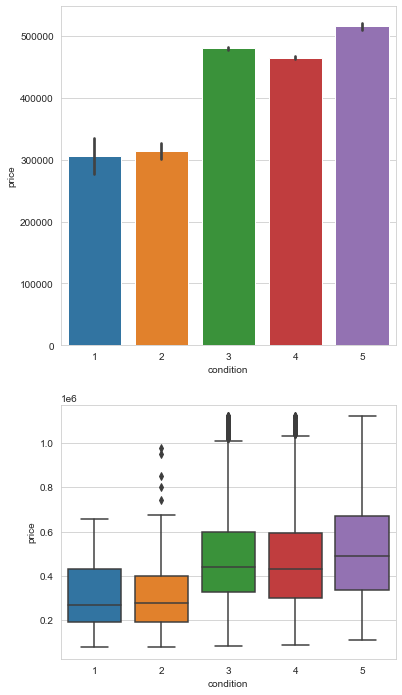

In [152]:
fig, axs=plt.subplots(nrows=2, ncols=1, figsize=(6,12), gridspec_kw={'height_ratios': [2,1.5]})

sns.barplot(data=df_iqrp, x='condition', y='price', ax=axs[0], ci=68)
sns.boxplot(data=df_iqrp, x='condition', y='price', ax=axs[1])

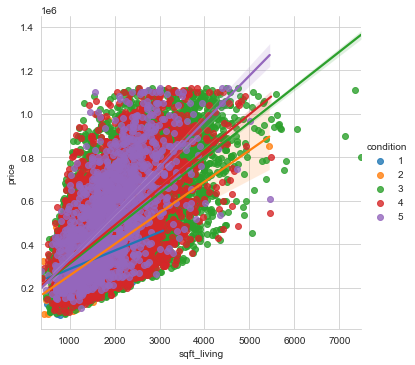

In [153]:
g = sns.lmplot(data=df_iqrp, x="sqft_living", y="price", hue="condition", )

<AxesSubplot:xlabel='grade', ylabel='price'>

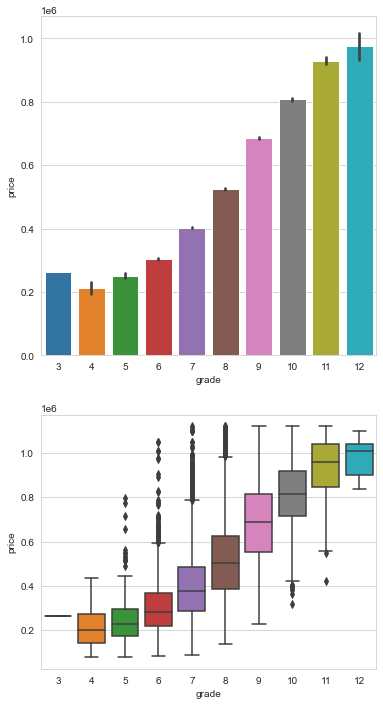

In [154]:
fig, axs=plt.subplots(nrows=2, ncols=1, figsize=(6,12), gridspec_kw={'height_ratios': [2,1.5]})

sns.barplot(data=df_iqrp, x='grade', y='price', ax=axs[0], ci=68)
sns.boxplot(data=df_iqrp, x='grade', y='price', ax=axs[1])